#### Import necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("data\\data.xlsx")
print("Number of instance in the dataset is :{}".format(len(df)))

Number of instance in the dataset is :9720


In [3]:
df = df[df["LMTD"] > 0]
print("Number of instance in the dataset is :{}".format(len(df)))

Number of instance in the dataset is :8480


In [4]:
# Drop the data points with non positive chilling Duty
df = df[df["LA Chilling Duty"] >= 0]
print("Number of instance in the dataset is :{}".format(len(df)))

Number of instance in the dataset is :5704


In [5]:
df

State  FG Massflow (kg/h)  Flue gas CO2 cons  FG Temperature  \
0        Case 1               72100             0.0905              20   
1        Case 2               72100             0.0905              20   
2        Case 3               72100             0.0905              20   
3        Case 4               72100             0.0905              20   
4        Case 5               72100             0.0905              20   
...         ...                 ...                ...             ...   
9713  Case 9714               72070             0.1324              50   
9714  Case 9715               72070             0.1324              50   
9717  Case 9718               72070             0.1324              50   
9718  Case 9719               72070             0.1324              50   
9719  Case 9720               72070             0.1324              50   

      Lean Amine Mass flow (kg/h)  Lean Amine Temperature  WWT Flow rate  \
0                          100000                      30          55000   
1                          100000                      30          55000   
2                          100000                      30          55000   
3                          100000                      30          55000   
4                          100000                      30          55000   
...                           ...                     ...            ...   
9713                       300000                      50          55000   
9714                       300000                      50          55000   
9717                       300000                      50          55000   
9718                       300000                      50          55000   
9719                       300000                      50          55000   

      WWB Flow rate  RA2Reg-Temperature  Reboiler Duty (kJ/h)  ...  \
0             55000               103.0              20000000  ...   
1             55000               103.0              28000000  ...   
2             55000               103.0              36000000  ...   
3             55000               103.0              44000000  ...   
4             55000               103.0              52000000  ...   
...             ...                 ...                   ...  ...   
9713          55010               104.5              44000000  ...   
9714          55010               104.5              52000000  ...   
9717          55010               106.0              36000000  ...   
9718          55010               106.0              44000000  ...   
9719          55010               106.0              52000000  ...   

      CO2 Product purity  CO2 Production Mass Flow  Reg Bttm Temp  \
0                 0.9852                      5504          119.8   
1                 0.9857                      7030          121.9   
2                 0.9859                      7817          122.5   
3                 0.9860                      8296          122.8   
4                 0.9861                      8632          123.0   
...                  ...                       ...            ...   
9713              0.9854                     11190          117.6   
9714              0.9857                     12150          118.9   
9717              0.9852                     10400          116.6   
9718              0.9855                     11530          118.1   
9719              0.9857                     12350          119.2   

      Reg Bttm Flow Rate  LA after HE  Left Min Apprch  Right Min Appr  \
0                  99100        34.49           10.570           16.84   
1                  98600        38.04           13.820           18.85   
2                  98300        39.51           15.090           19.51   
3                  98200        40.34           15.770           19.82   
4                  98000        40.92           16.210           20.00   
...                  ...          ...              ...             ...   
9713              29

## Exploring the data

In [6]:
df.columns

Index(['State', 'FG Massflow (kg/h)', 'Flue gas CO2 cons', 'FG Temperature',
       'Lean Amine Mass flow (kg/h)', 'Lean Amine Temperature',
       'WWT Flow rate', 'WWB Flow rate', 'RA2Reg-Temperature',
       'Reboiler Duty (kJ/h)', 'LA Chilling Duty', 'WWT Cooling Duty',
       'WWT Cooling Duty2', 'MEA Emission PPM', 'CO2 Mass Flow @ Off Gas',
       'MEA Emission', 'FG Flue Rate (Sm3/h)', 'L/G (kg/kg)', 'L/G (kg/Sm3)',
       'Lean Loading', 'Captured CO2 (kg/h)', 'CO2 Capture Efficiency',
       'Rich Loading', 'RA Flow Rate', 'RA Temp after Abs', 'Reboiler Duty',
       'Condensor Duty (kJ/h)', 'SRD (MJ/kg CO2)', 'Condensor Specific Duty',
       'CO2 Product purity', 'CO2 Production Mass Flow', 'Reg Bttm Temp',
       'Reg Bttm Flow Rate', 'LA after HE', 'Left Min Apprch',
       'Right Min Appr', 'LMTD', 'MEA Makeup', 'Abs Height'],
      dtype='object')

In [7]:
df.describe().transpose()

count          mean           std           min  \
FG Massflow (kg/h)           5704.0  7.207411e+04  1.031939e+01  7.207000e+04   
Flue gas CO2 cons            5704.0  8.359599e-02  3.298276e-02  3.600000e-02   
FG Temperature               5704.0  3.695126e+01  1.178362e+01  2.000000e+01   
Lean Amine Mass flow (kg/h)  5704.0  1.351625e+05  8.233373e+04  4.160000e+04   
Lean Amine Temperature       5704.0  3.728787e+01  7.417124e+00  3.000000e+01   
WWT Flow rate                5704.0  5.500000e+04  0.000000e+00  5.500000e+04   
WWB Flow rate                5704.0  5.500863e+04  3.439796e+00  5.500000e+04   
RA2Reg-Temperature           5704.0  1.043051e+02  1.206691e+00  1.030000e+02   
Reboiler Duty (kJ/h)         5704.0  3.078945e+07  1.236984e+07  1.000000e+07   
LA Chilling Duty             5704.0  6.601097e+06  6.968066e+06  1.936000e+03   
WWT Cooling Duty             5704.0  3.128264e+06  1.346168e+06  3.070000e+05   
WWT Cooling Duty2            5704.0  4.359905e+06  1.451078e+06  6.506000e+05   
MEA Emission PPM             5704.0  1.613702e-01  3.216315e-01  1.726000e-04   
CO2 Mass Flow @ Off Gas      5704.0  2.207056e+03  1.994389e+03  1.221000e+01   
MEA Emission                 5704.0  1.613925e-07  3.217061e-07  1.726000e-10   
FG Flue Rate (Sm3/h)         5704.0  5.789569e+04  1.036741e+03  5.638000e+04   
L/G (kg/kg)                  5704.0  1.875638e+00  1.142761e+00  5.772000e-01   
L/G (kg/Sm3)                 5704.0  2.352114e+00  1.458413e+00  7.002000e-01   
Lean Loading                 5704.0  2.049223e-01  7.820774e-02  7.095000e-02   
Captured CO2 (kg/h)          5704.0  6.737296e+03  2.938513e+03  2.502000e+03   
CO2 Capture Efficiency       5704.0  7.700561e+01  1.879548e+01  2.872000e+01   
Rich Loading                 5704.0  4.699677e-01  3.968865e-02  3.232000e-01   
RA Flow Rate                 5704.0  1.404476e+05  8.445365e+04  4.316000e+04   
RA Temp after Abs            5704.0  3.836125e+01  7.370878e+00  2.088000e+01   
Reboiler Duty                5704.0  3.078945e+07  1.236984e+07  1.000000e+07   
Condensor Duty (kJ/h)        5704.0  1.284328e+07  6.109412e+06  2.917000e+06   
SRD (MJ/kg CO2)              5704.0  4.765017e+00  1.247572e+00  2.941000e+00   
Condensor Specific Duty      5704.0  2.081913e+00  1.090142e+00  1.120000e+00   
CO2 Product purity           5704.0  9.856748e-01  5.815067e-04  9.828000e-01   
CO2 Production Mass Flow     5704.0  6.781539e+03  2.959779e+03  2.515000e+03   
Reg Bttm Temp                5704.0  1.205428e+02  2.568666e+00  1.108000e+02   
Reg Bttm Flow Rate           5704.0  1.336667e+05  8.205559e+04  4.020000e+04   
LA after HE                  5704.0  5.040206e+01  9.103813e+00  2.997000e+01   
Left Min Apprch              5704.0  1.204087e+01  5.714874e+00  4.490000e-02   
Right Min Appr               5704.0  1.623721e+01  2.661992e+00  7.289000e+00   
LMTD                         5704.0  1.382633e+01  4.264904e+00  1.663000e+00   
MEA Makeup                   5704.0  1.354874e+00  3.618611e+00  0.000000e+00   
Abs Height                   5704.0  1.749404e+01  4.864350e+00  1.200000e+01   

                                      25%           50%           75%  \
FG Massflow (kg/h)           7.207000e+04  7.207000e+04  7.207000e+04   
Flue gas CO2 cons            5.950000e-02  9.050000e-02  1.088000e-01   
FG Temperature               2.000000e+01  3.500000e+01  5.000000e+01   
Lean Amine Mass flow (kg/h)  8.120000e+04  1.010000e+05  1.670000e+05   
Lean Amine Temperature       3.000000e+01  4.000000e+01  4.000000e+01   
WWT Flow rate                5.500000e+04  5.500000e+04  5.500000e+04   
WWB Flow rate                5.501000e+04  5.501000e+04  5.501000e+04   
RA2Reg-Temperature           1.030000e+02  1.045000e+02  1.060000e+02   
Reboiler Duty (kJ/h)         2.000000e+07  3.000000e+07  4.400000e+07   
LA Chilling Duty             1.786000e+06  3.944500e+06  8.888750e+06   
WWT Cooling Duty             2.110000e+06  2.908000e+06  4.105500e+

In [8]:
df.groupby(["Flue gas CO2 cons"]).mean()["SRD (MJ/kg CO2)"]

Flue gas CO2 cons
0.0360    5.918239
0.0595    4.781794
0.0838    4.705801
0.0905    4.611641
0.1088    4.251134
0.1324    4.023896
Name: SRD (MJ/kg CO2), dtype: float64

In [9]:
df.groupby(["Flue gas CO2 cons", "Abs Height"]).std()["SRD (MJ/kg CO2)"]

Flue gas CO2 cons  Abs Height
0.0360             12            1.489780
                   18            1.405795
                   24            1.392912
0.0595             12            1.141965
                   18            1.198181
                   24            1.203629
0.0838             12            1.220313
                   18            1.225402
                   24            1.252473
0.0905             12            0.846821
                   18            0.793717
                   24            0.803286
0.1088             12            0.740948
                   18            0.698323
                   24            0.721084
0.1324             12            0.721200
                   18            0.697385
                   24            0.704601
Name: SRD (MJ/kg CO2), dtype: float64

In [10]:
df.groupby(["Flue gas CO2 cons"]).describe()[["CO2 Capture Efficiency","SRD (MJ/kg CO2)"]]

CO2 Capture Efficiency                               \
                                   count       mean        std    min   
Flue gas CO2 cons                                                       
0.0360                            1209.0  91.599926   9.425238  62.86   
0.0595                             867.0  71.267578  18.092525  39.40   
0.0838                             755.0  51.638927  14.298897  28.72   
0.0905                             916.0  85.807533  11.907557  53.81   
0.1088                             998.0  80.107766  14.740328  45.65   
0.1324                             959.0  72.129353  16.093976  38.30   

                                                   SRD (MJ/kg CO2)            \
                       25%     50%      75%    max           count      mean   
Flue gas CO2 cons                                                              
0.0360             88.6800  94.410  98.6500  99.69          1209.0  5.918239   
0.0595             56.1950  74.190  89.1450  99.40           867.0  4.781794   
0.0838             40.7100  50.450  62.5050  81.08           755.0  4.705801   
0.0905             79.0200  88.470  95.1900  99.47           916.0  4.611641   
0.1088             68.7825  83.555  93.1225  99.20           998.0  4.251134   
0.1324             59.2500  74.370  86.6600  97.79           959.0  4.023896   

                                                                     
                        std    min      25%     50%      75%    max  
Flue gas CO2 cons                                                    
0.0360             1.433304  3.262  4.77500  5.9180  7.13400  8.376  
0.0595             1.178407  3.135  3.86650  4.4600  5.14250  8.017  
0.0838             1.230397  3.124  3.79700  4.2760  5.10900  7.942  
0.0905             0.820614  3.088  3.90700  4.6205  5.41225  6.443  
0.1088             0.726061  2.946  3.69025  4.0680  4.63475  6.361  
0.1324             0.712473  2.941  3.56400  3.8750  4.22550  6.312

### Visualization

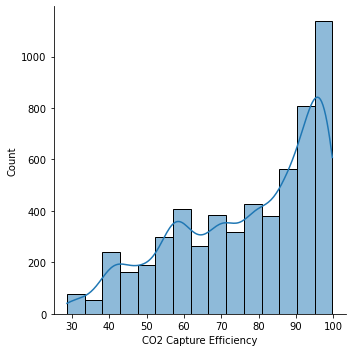

In [11]:
sns.displot(df["CO2 Capture Efficiency"], bins=15, kde=True)

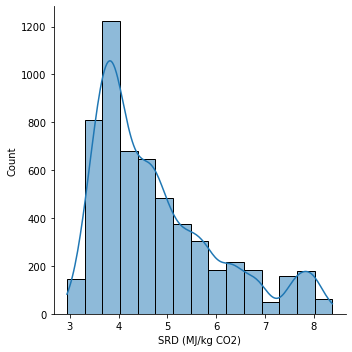

In [12]:
sns.displot(df["SRD (MJ/kg CO2)"], bins=15, kde=True)

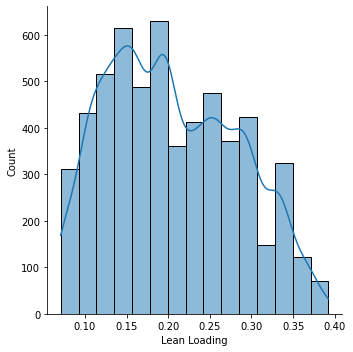

In [13]:
sns.displot(df["Lean Loading"], bins=15, kde=True)

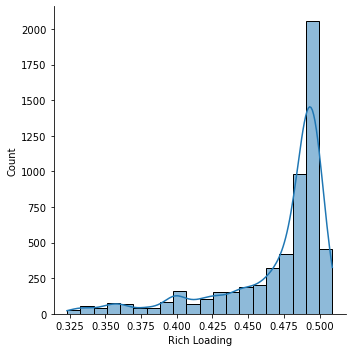

In [14]:
sns.displot(df["Rich Loading"], bins=20, kde=True)

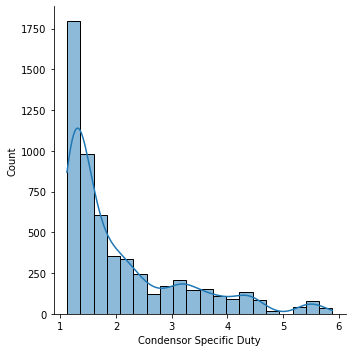

In [15]:
sns.displot(df["Condensor Specific Duty"], bins=20, kde=True)

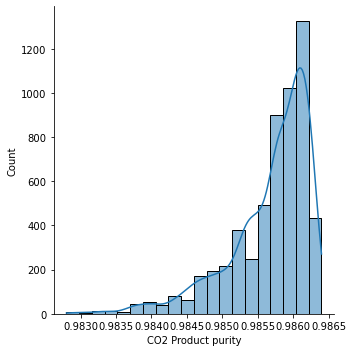

In [16]:
sns.displot(df["CO2 Product purity"], bins=20, kde=True)

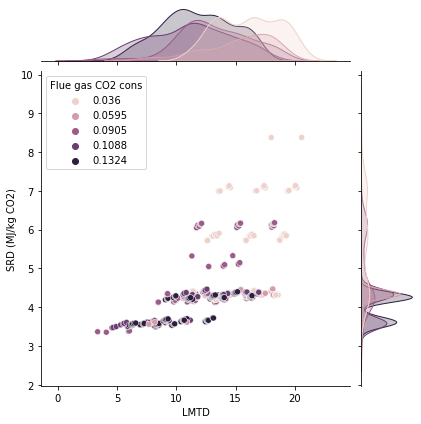

In [17]:
sns.jointplot(data= df[ (df["CO2 Capture Efficiency"] >= 85) & (df["CO2 Capture Efficiency"] <= 90)] , 
              x= "LMTD", 
              y="SRD (MJ/kg CO2)",
              hue="Flue gas CO2 cons",
              cmap="Blues"
             )

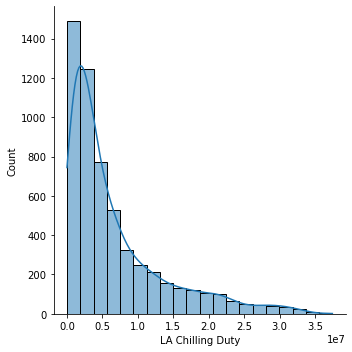

In [18]:
sns.displot(df["LA Chilling Duty"], bins=20, kde=True)

In [19]:
df["SCD (MJ/kg)"] = (0.001 * df["LA Chilling Duty"]) / df["Captured CO2 (kg/h)"]

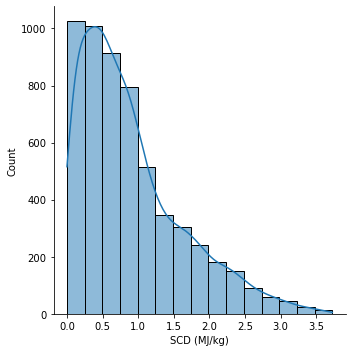

In [20]:
sns.displot(df["SCD (MJ/kg)"], bins=15, kde=True)

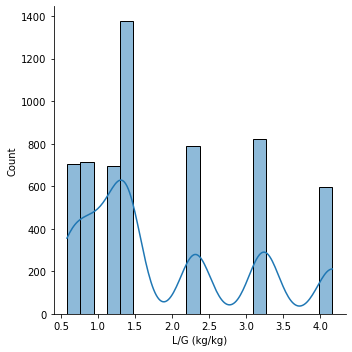

In [21]:
sns.displot(df["L/G (kg/kg)"], bins=20, kde=True)

# Machine Learning

#### Import common Machine Learning Packages

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from joblib import dump, load

#### Define the inputs & outputs 

In [23]:
# XA Represents the data for Advanced Design
XA = df[["FG Temperature", "Lean Loading",'Lean Amine Temperature','L/G (kg/kg)','Flue gas CO2 cons','CO2 Capture Efficiency','LMTD','Abs Height']]

In [24]:
# X2 Represents the data for Naive Design
XN = df[["FG Temperature", "Lean Loading",'Lean Amine Temperature','L/G (kg/kg)','Flue gas CO2 cons','CO2 Capture Efficiency']]

In [25]:
y = df[["SRD (MJ/kg CO2)", "Condensor Specific Duty", "SCD (MJ/kg)"]]

In [26]:
XA_train, XA_test, y_train, y_test = train_test_split(XA, y, test_size=0.30, random_state=211)
XN_train, XN_test, y_train, y_test = train_test_split(XN, y, test_size=0.30, random_state=211)

In [27]:
pdict1 = {"R^2_A":[],"MAE_A":[],"MAPE_A":[], "RMSE_A":[],"R^2_N":[],"MAE_N":[],"MAPE_N":[], "RMSE_N":[]}
pdict2 = {"R^2_A":[],"MAE_A":[],"MAPE_A":[], "RMSE_A":[],"R^2_N":[],"MAE_N":[],"MAPE_N":[], "RMSE_N":[]}
pdict3 = {"R^2_A":[],"MAE_A":[],"MAPE_A":[], "RMSE_A":[],"R^2_N":[],"MAE_N":[],"MAPE_N":[], "RMSE_N":[]}

## Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
LRmodelA = MultiOutputRegressor(LinearRegression()).fit(XA_train, y_train)
LRmodelN = MultiOutputRegressor(LinearRegression()).fit(XN_train, y_train)

In [30]:
LRmodelA_pred = LRmodelA.predict(XA_test)
LRmodelN_pred = LRmodelN.predict(XN_test)

In [31]:
pdict1["R^2_A"].append(r2_score(y_test["SRD (MJ/kg CO2)"], LRmodelA_pred[: , 0]))
pdict1["MAE_A"].append(mean_absolute_error(y_test["SRD (MJ/kg CO2)"], LRmodelA_pred[: , 0]))
pdict1["MAPE_A"].append(mean_absolute_percentage_error(y_test["SRD (MJ/kg CO2)"], LRmodelA_pred[: , 0]))
pdict1["RMSE_A"].append(np.sqrt(mean_squared_error(y_test["SRD (MJ/kg CO2)"], LRmodelA_pred[: , 0])))
pdict1["R^2_N"].append(r2_score(y_test["SRD (MJ/kg CO2)"], LRmodelN_pred[: , 0]))
pdict1["MAE_N"].append(mean_absolute_error(y_test["SRD (MJ/kg CO2)"], LRmodelN_pred[: , 0]))
pdict1["MAPE_N"].append(mean_absolute_percentage_error(y_test["SRD (MJ/kg CO2)"], LRmodelN_pred[: , 0]))
pdict1["RMSE_N"].append(np.sqrt(mean_squared_error(y_test["SRD (MJ/kg CO2)"], LRmodelN_pred[: , 0])))

In [32]:
pdict2["R^2_A"].append(r2_score(y_test["Condensor Specific Duty"], LRmodelA_pred[: , 1]))
pdict2["MAE_A"].append(mean_absolute_error(y_test["Condensor Specific Duty"], LRmodelA_pred[: , 1]))
pdict2["MAPE_A"].append(mean_absolute_percentage_error(y_test["Condensor Specific Duty"], LRmodelA_pred[: , 1]))
pdict2["RMSE_A"].append(np.sqrt(mean_squared_error(y_test["Condensor Specific Duty"], LRmodelA_pred[: , 1])))
pdict2["R^2_N"].append(r2_score(y_test["Condensor Specific Duty"], LRmodelN_pred[: , 1]))
pdict2["MAE_N"].append(mean_absolute_error(y_test["Condensor Specific Duty"], LRmodelN_pred[: , 1]))
pdict2["MAPE_N"].append(mean_absolute_percentage_error(y_test["Condensor Specific Duty"], LRmodelN_pred[: , 1]))
pdict2["RMSE_N"].append(np.sqrt(mean_squared_error(y_test["Condensor Specific Duty"], LRmodelN_pred[: , 1])))

In [33]:
pdict3["R^2_A"].append(r2_score(y_test["SCD (MJ/kg)"], LRmodelA_pred[: , 2]))
pdict3["MAE_A"].append(mean_absolute_error(y_test["SCD (MJ/kg)"], LRmodelA_pred[: , 2]))
pdict3["MAPE_A"].append(mean_absolute_percentage_error(y_test["SCD (MJ/kg)"], LRmodelA_pred[: , 2]))
pdict3["RMSE_A"].append(np.sqrt(mean_squared_error(y_test["SCD (MJ/kg)"], LRmodelA_pred[: , 2])))
pdict3["R^2_N"].append(r2_score(y_test["SCD (MJ/kg)"], LRmodelN_pred[: , 2]))
pdict3["MAE_N"].append(mean_absolute_error(y_test["SCD (MJ/kg)"], LRmodelN_pred[: , 2]))
pdict3["MAPE_N"].append(mean_absolute_percentage_error(y_test["SCD (MJ/kg)"], LRmodelN_pred[: , 2]))
pdict3["RMSE_N"].append(np.sqrt(mean_squared_error(y_test["SCD (MJ/kg)"], LRmodelN_pred[: , 2])))

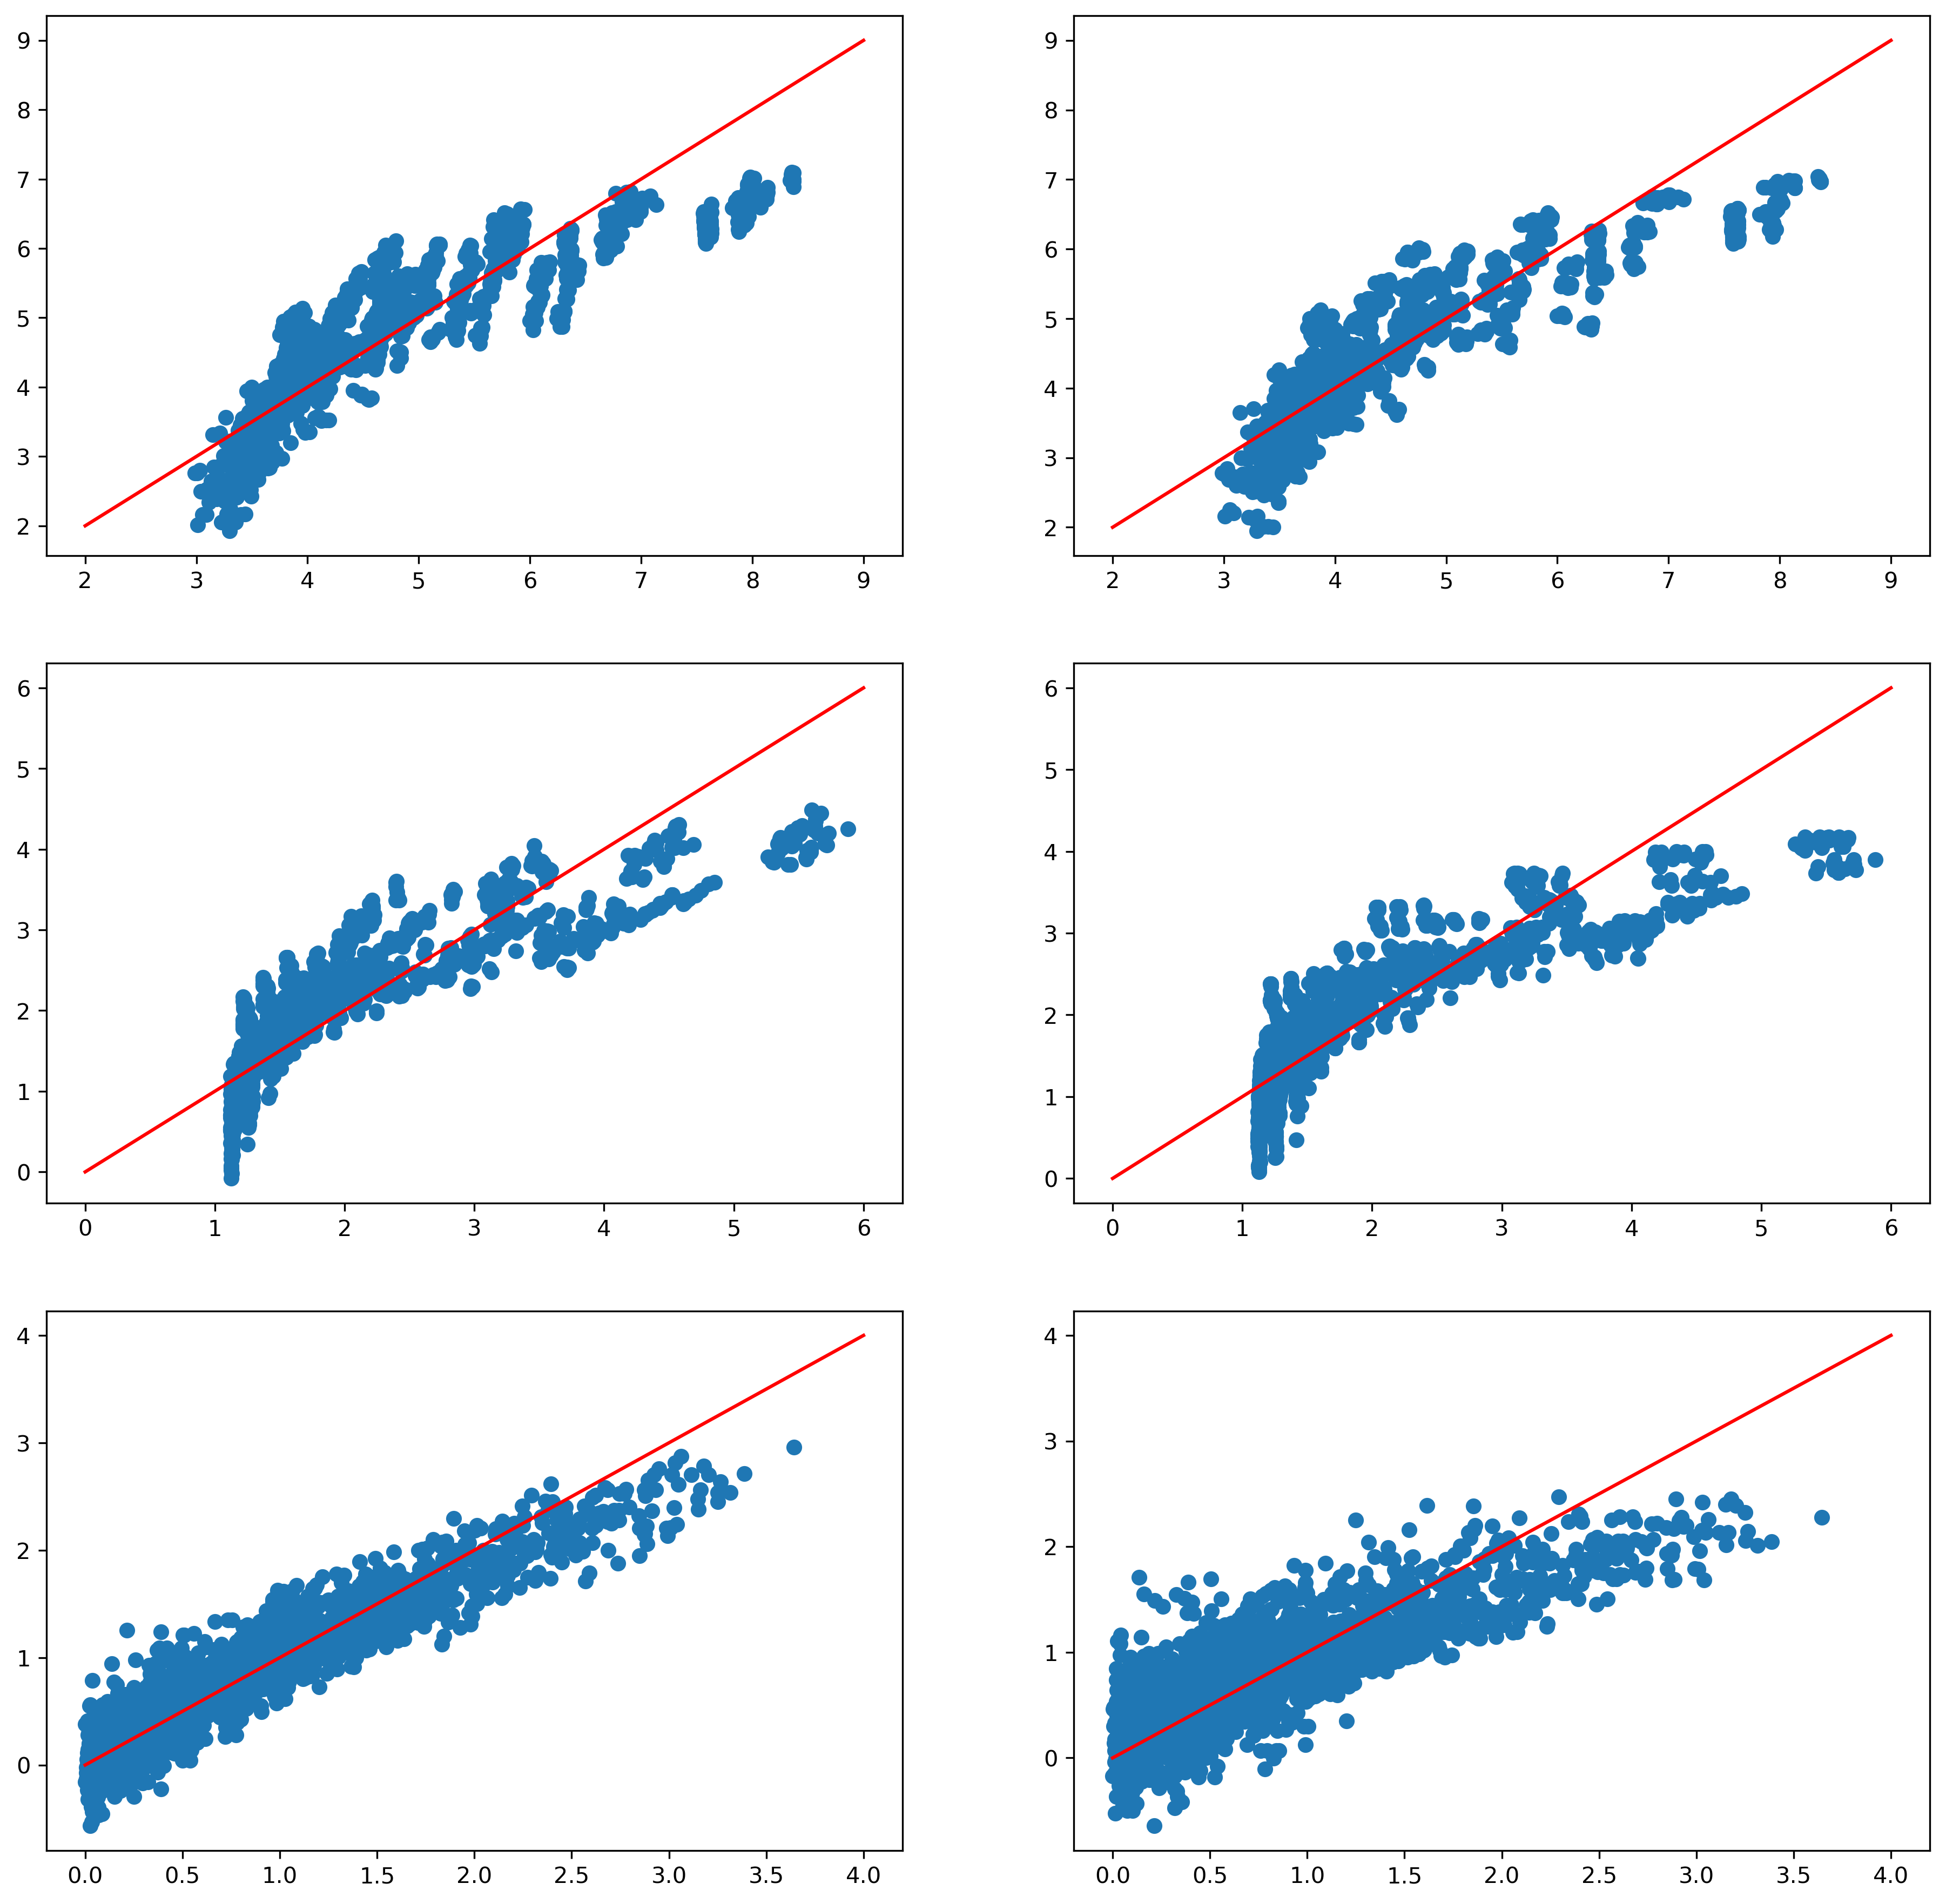

<Figure size 432x288 with 0 Axes>

In [34]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,15), dpi=300)
fig = plt.figure()

axes[0,0].plot(np.arange(2,10), np.arange(2,10), color = "red")
axes[0,0].scatter(y_test["SRD (MJ/kg CO2)"], LRmodelA_pred[: , 0])
axes[0,1].plot(np.arange(2,10), np.arange(2,10), color = "red")
axes[0,1].scatter(y_test["SRD (MJ/kg CO2)"], LRmodelN_pred[: , 0])

axes[1,0].plot(np.arange(0,7), np.arange(0,7), color = "red")
axes[1,0].scatter(y_test['Condensor Specific Duty'], LRmodelA_pred[: , 1])
axes[1,1].plot(np.arange(0,7), np.arange(0,7), color = "red")
axes[1,1].scatter(y_test['Condensor Specific Duty'], LRmodelN_pred[: , 1])

axes[2,0].plot(np.arange(0,5), np.arange(0,5), color = "red")
axes[2,0].scatter(y_test['SCD (MJ/kg)'], LRmodelA_pred[: , 2])
axes[2,1].plot(np.arange(0,5), np.arange(0,5), color = "red")
axes[2,1].scatter(y_test['SCD (MJ/kg)'], LRmodelN_pred[: , 2])


## SVM

In [35]:
from sklearn.svm import SVR

In [36]:
SVmodelA = MultiOutputRegressor(Pipeline([('scaler', StandardScaler()), ('svr', SVR(kernel='rbf', degree=2, epsilon=0, gamma='auto', C= 1000))])).fit(XA_train, y_train)
SVmodelN = MultiOutputRegressor(Pipeline([('scaler', StandardScaler()), ('svr', SVR(kernel='rbf', degree=2, epsilon=0, gamma='auto', C= 1000))])).fit(XN_train, y_train)

In [37]:
SVmodelA_pred = SVmodelA.predict(XA_test)
SVmodelN_pred = SVmodelN.predict(XN_test)

In [38]:
pdict1["R^2_A"].append(r2_score(y_test["SRD (MJ/kg CO2)"], SVmodelA_pred[: , 0]))
pdict1["MAE_A"].append(mean_absolute_error(y_test["SRD (MJ/kg CO2)"], SVmodelA_pred[: , 0]))
pdict1["MAPE_A"].append(mean_absolute_percentage_error(y_test["SRD (MJ/kg CO2)"], SVmodelA_pred[: , 0]))
pdict1["RMSE_A"].append(np.sqrt(mean_squared_error(y_test["SRD (MJ/kg CO2)"], SVmodelA_pred[: , 0])))
pdict1["R^2_N"].append(r2_score(y_test["SRD (MJ/kg CO2)"], SVmodelN_pred[: , 0]))
pdict1["MAE_N"].append(mean_absolute_error(y_test["SRD (MJ/kg CO2)"], SVmodelN_pred[: , 0]))
pdict1["MAPE_N"].append(mean_absolute_percentage_error(y_test["SRD (MJ/kg CO2)"], SVmodelN_pred[: , 0]))
pdict1["RMSE_N"].append(np.sqrt(mean_squared_error(y_test["SRD (MJ/kg CO2)"], SVmodelN_pred[: , 0])))

In [39]:
pdict2["R^2_A"].append(r2_score(y_test["Condensor Specific Duty"], SVmodelA_pred[: , 1]))
pdict2["MAE_A"].append(mean_absolute_error(y_test["Condensor Specific Duty"], SVmodelA_pred[: , 1]))
pdict2["MAPE_A"].append(mean_absolute_percentage_error(y_test["Condensor Specific Duty"], SVmodelA_pred[: , 1]))
pdict2["RMSE_A"].append(np.sqrt(mean_squared_error(y_test["Condensor Specific Duty"], SVmodelA_pred[: , 1])))
pdict2["R^2_N"].append(r2_score(y_test["Condensor Specific Duty"], SVmodelN_pred[: , 1]))
pdict2["MAE_N"].append(mean_absolute_error(y_test["Condensor Specific Duty"], SVmodelN_pred[: , 1]))
pdict2["MAPE_N"].append(mean_absolute_percentage_error(y_test["Condensor Specific Duty"], SVmodelN_pred[: , 1]))
pdict2["RMSE_N"].append(np.sqrt(mean_squared_error(y_test["Condensor Specific Duty"], SVmodelN_pred[: , 1])))

In [40]:
pdict3["R^2_A"].append(r2_score(y_test["SCD (MJ/kg)"], SVmodelA_pred[: , 2]))
pdict3["MAE_A"].append(mean_absolute_error(y_test["SCD (MJ/kg)"], SVmodelA_pred[: , 2]))
pdict3["MAPE_A"].append(mean_absolute_percentage_error(y_test["SCD (MJ/kg)"], SVmodelA_pred[: , 2]))
pdict3["RMSE_A"].append(np.sqrt(mean_squared_error(y_test["SCD (MJ/kg)"], SVmodelA_pred[: , 2])))
pdict3["R^2_N"].append(r2_score(y_test["SCD (MJ/kg)"], SVmodelN_pred[: , 2]))
pdict3["MAE_N"].append(mean_absolute_error(y_test["SCD (MJ/kg)"], SVmodelN_pred[: , 2]))
pdict3["MAPE_N"].append(mean_absolute_percentage_error(y_test["SCD (MJ/kg)"], SVmodelN_pred[: , 2]))
pdict3["RMSE_N"].append(np.sqrt(mean_squared_error(y_test["SCD (MJ/kg)"], SVmodelN_pred[: , 2])))

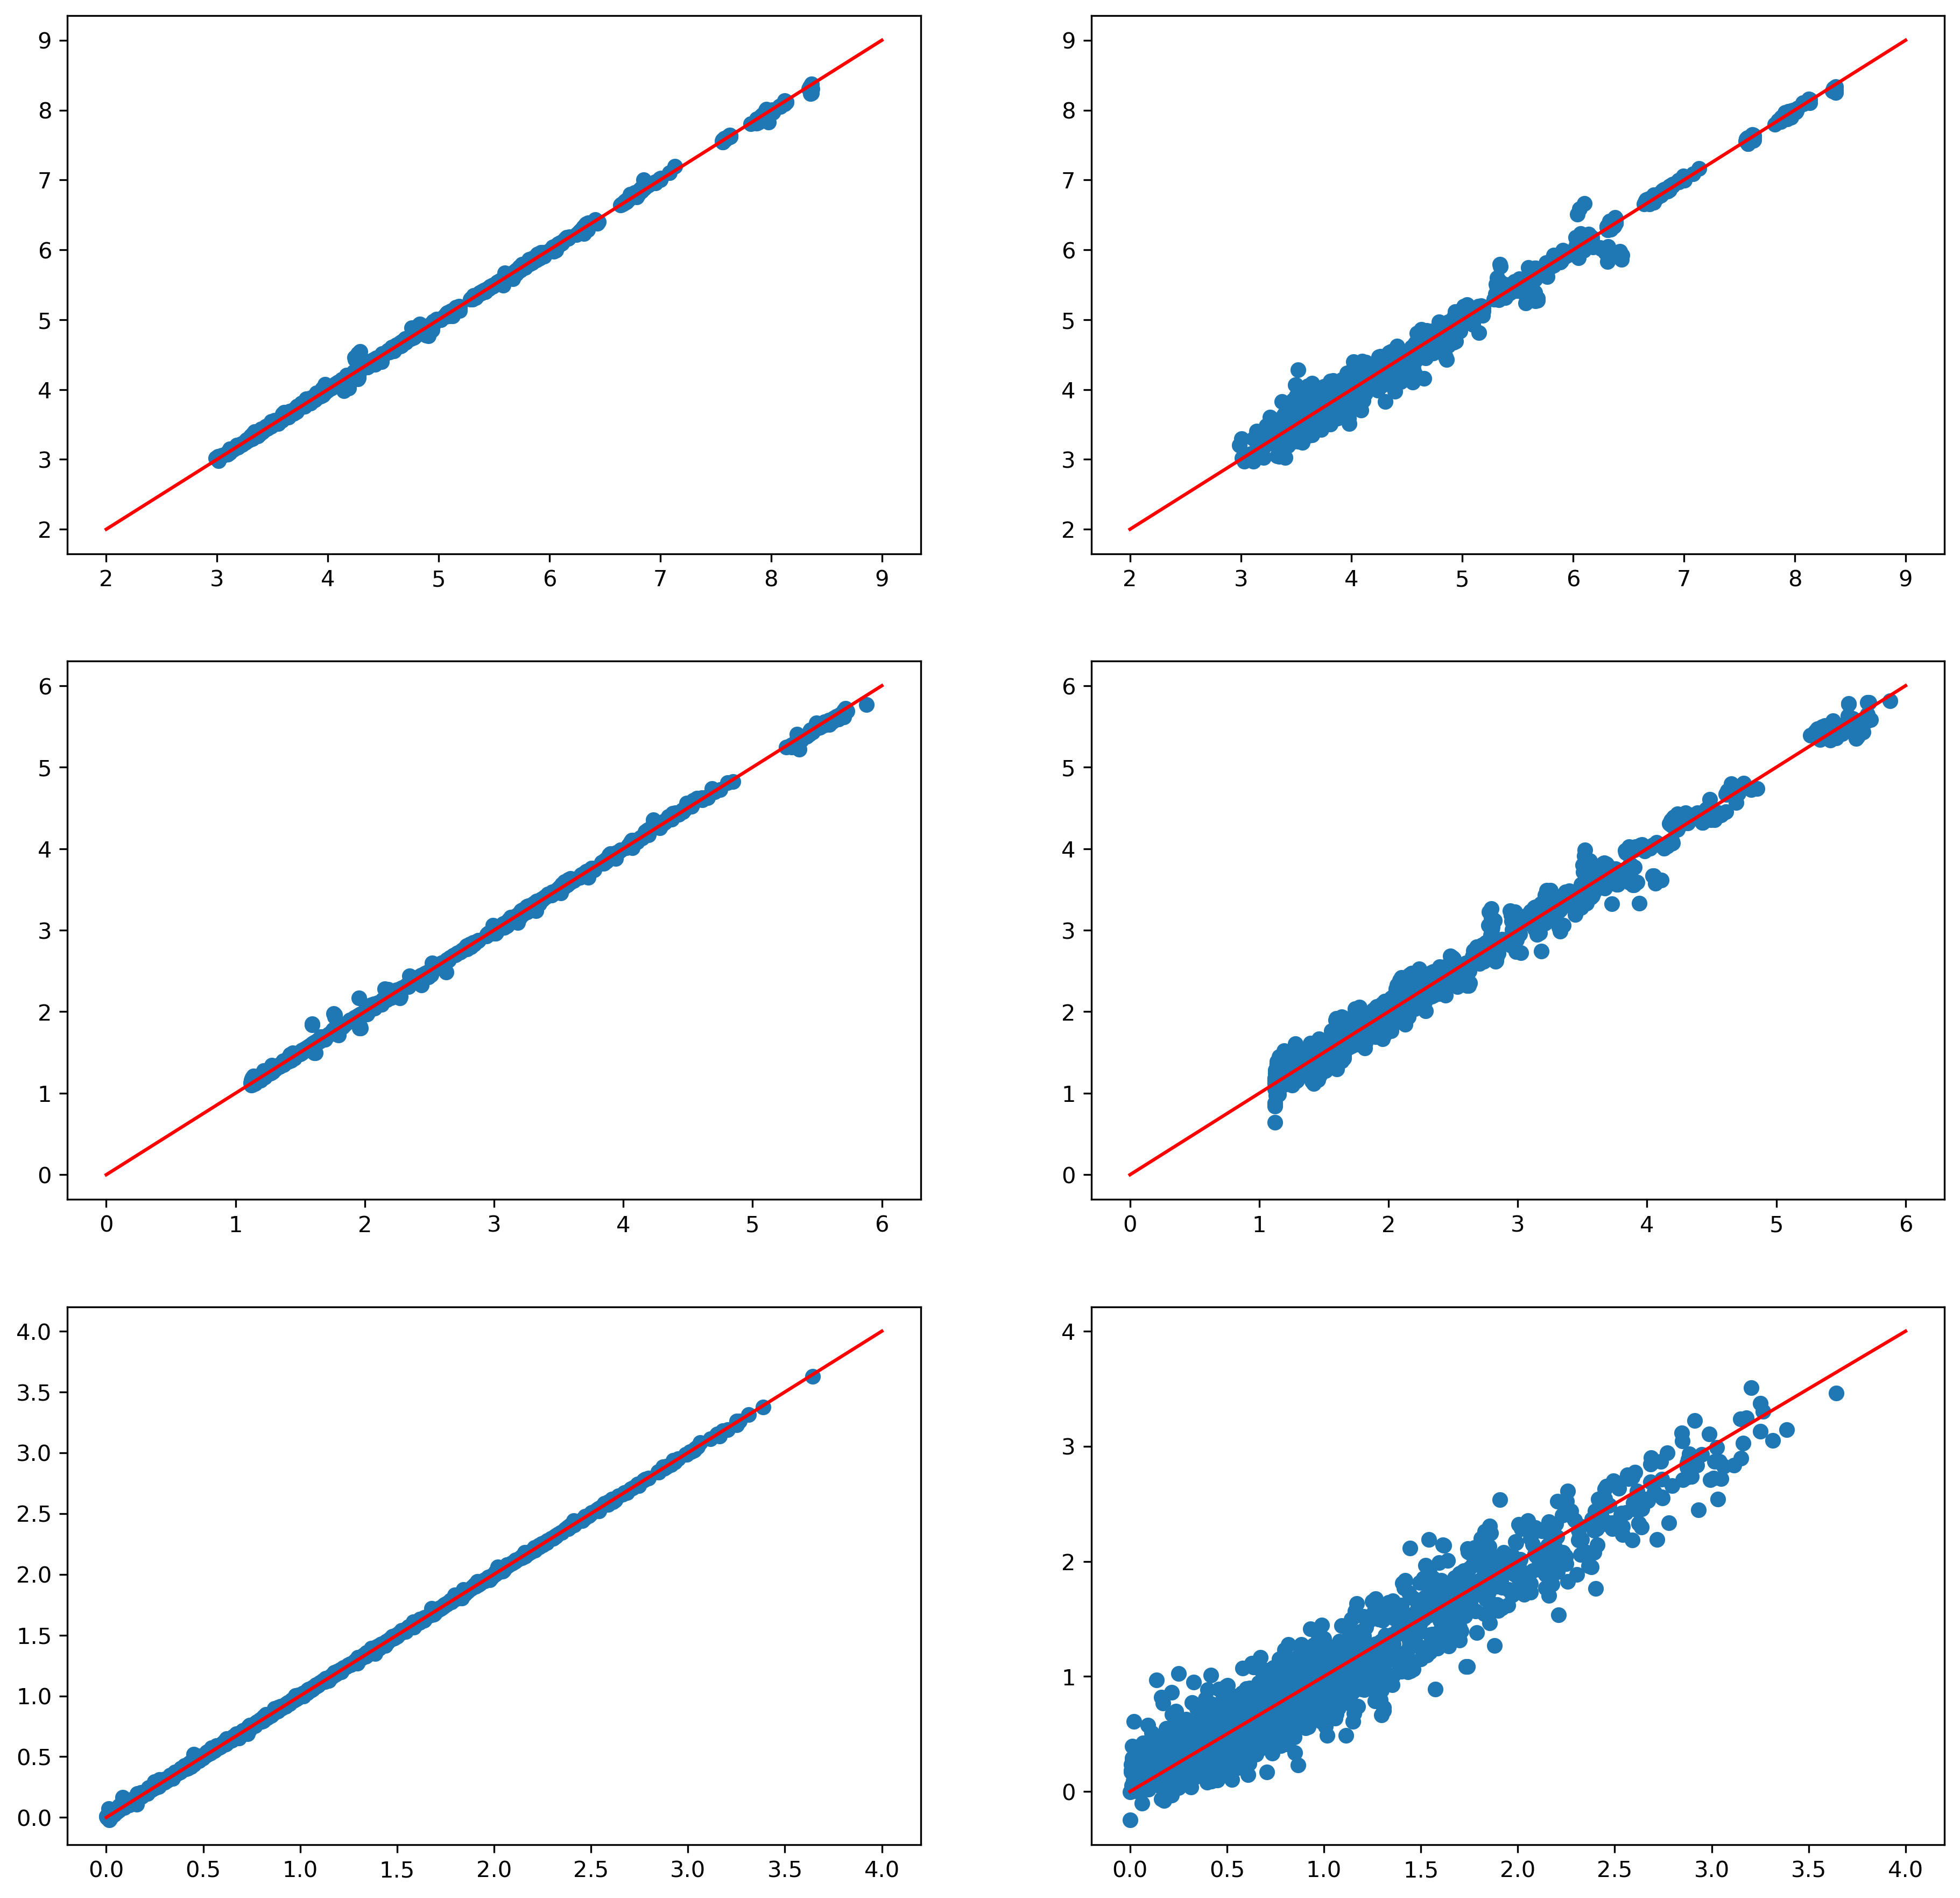

<Figure size 432x288 with 0 Axes>

In [41]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,15), dpi=300)
fig = plt.figure()

axes[0,0].plot(np.arange(2,10), np.arange(2,10), color = "red")
axes[0,0].scatter(y_test["SRD (MJ/kg CO2)"], SVmodelA_pred[: , 0])
axes[0,1].plot(np.arange(2,10), np.arange(2,10), color = "red")
axes[0,1].scatter(y_test["SRD (MJ/kg CO2)"], SVmodelN_pred[: , 0])

axes[1,0].plot(np.arange(0,7), np.arange(0,7), color = "red")
axes[1,0].scatter(y_test['Condensor Specific Duty'], SVmodelA_pred[: , 1])
axes[1,1].plot(np.arange(0,7), np.arange(0,7), color = "red")
axes[1,1].scatter(y_test['Condensor Specific Duty'], SVmodelN_pred[: , 1])

axes[2,0].plot(np.arange(0,5), np.arange(0,5), color = "red")
axes[2,0].scatter(y_test['SCD (MJ/kg)'], SVmodelA_pred[: , 2])
axes[2,1].plot(np.arange(0,5), np.arange(0,5), color = "red")
axes[2,1].scatter(y_test['SCD (MJ/kg)'], SVmodelN_pred[: , 2])

## Decision Tree

In [42]:
from sklearn.tree import DecisionTreeRegressor

In [43]:
DTmodelA = MultiOutputRegressor(DecisionTreeRegressor()).fit(XA_train, y_train)
DTmodelN = MultiOutputRegressor(DecisionTreeRegressor()).fit(XN_train, y_train)

In [44]:
DTmodelA_pred = DTmodelA.predict(XA_test)
DTmodelN_pred = DTmodelN.predict(XN_test)

In [45]:
pdict1["R^2_A"].append(r2_score(y_test["SRD (MJ/kg CO2)"], DTmodelA_pred[: , 0]))
pdict1["MAE_A"].append(mean_absolute_error(y_test["SRD (MJ/kg CO2)"], DTmodelA_pred[: , 0]))
pdict1["MAPE_A"].append(mean_absolute_percentage_error(y_test["SRD (MJ/kg CO2)"], DTmodelA_pred[: , 0]))
pdict1["RMSE_A"].append(np.sqrt(mean_squared_error(y_test["SRD (MJ/kg CO2)"], DTmodelA_pred[: , 0])))
pdict1["R^2_N"].append(r2_score(y_test["SRD (MJ/kg CO2)"], DTmodelN_pred[: , 0]))
pdict1["MAE_N"].append(mean_absolute_error(y_test["SRD (MJ/kg CO2)"], DTmodelN_pred[: , 0]))
pdict1["MAPE_N"].append(mean_absolute_percentage_error(y_test["SRD (MJ/kg CO2)"], DTmodelN_pred[: , 0]))
pdict1["RMSE_N"].append(np.sqrt(mean_squared_error(y_test["SRD (MJ/kg CO2)"], DTmodelN_pred[: , 0])))

In [46]:
pdict2["R^2_A"].append(r2_score(y_test["Condensor Specific Duty"], DTmodelA_pred[: , 1]))
pdict2["MAE_A"].append(mean_absolute_error(y_test["Condensor Specific Duty"], DTmodelA_pred[: , 1]))
pdict2["MAPE_A"].append(mean_absolute_percentage_error(y_test["Condensor Specific Duty"], DTmodelA_pred[: , 1]))
pdict2["RMSE_A"].append(np.sqrt(mean_squared_error(y_test["Condensor Specific Duty"], DTmodelA_pred[: , 1])))
pdict2["R^2_N"].append(r2_score(y_test["Condensor Specific Duty"], DTmodelN_pred[: , 1]))
pdict2["MAE_N"].append(mean_absolute_error(y_test["Condensor Specific Duty"], DTmodelN_pred[: , 1]))
pdict2["MAPE_N"].append(mean_absolute_percentage_error(y_test["Condensor Specific Duty"], DTmodelN_pred[: , 1]))
pdict2["RMSE_N"].append(np.sqrt(mean_squared_error(y_test["Condensor Specific Duty"], DTmodelN_pred[: , 1])))

In [47]:
pdict3["R^2_A"].append(r2_score(y_test["SCD (MJ/kg)"], DTmodelA_pred[: , 2]))
pdict3["MAE_A"].append(mean_absolute_error(y_test["SCD (MJ/kg)"], DTmodelA_pred[: , 2]))
pdict3["MAPE_A"].append(mean_absolute_percentage_error(y_test["SCD (MJ/kg)"], DTmodelA_pred[: , 2]))
pdict3["RMSE_A"].append(np.sqrt(mean_squared_error(y_test["SCD (MJ/kg)"], DTmodelA_pred[: , 2])))
pdict3["R^2_N"].append(r2_score(y_test["SCD (MJ/kg)"], DTmodelN_pred[: , 2]))
pdict3["MAE_N"].append(mean_absolute_error(y_test["SCD (MJ/kg)"], DTmodelN_pred[: , 2]))
pdict3["MAPE_N"].append(mean_absolute_percentage_error(y_test["SCD (MJ/kg)"], DTmodelN_pred[: , 2]))
pdict3["RMSE_N"].append(np.sqrt(mean_squared_error(y_test["SCD (MJ/kg)"], DTmodelN_pred[: , 2])))

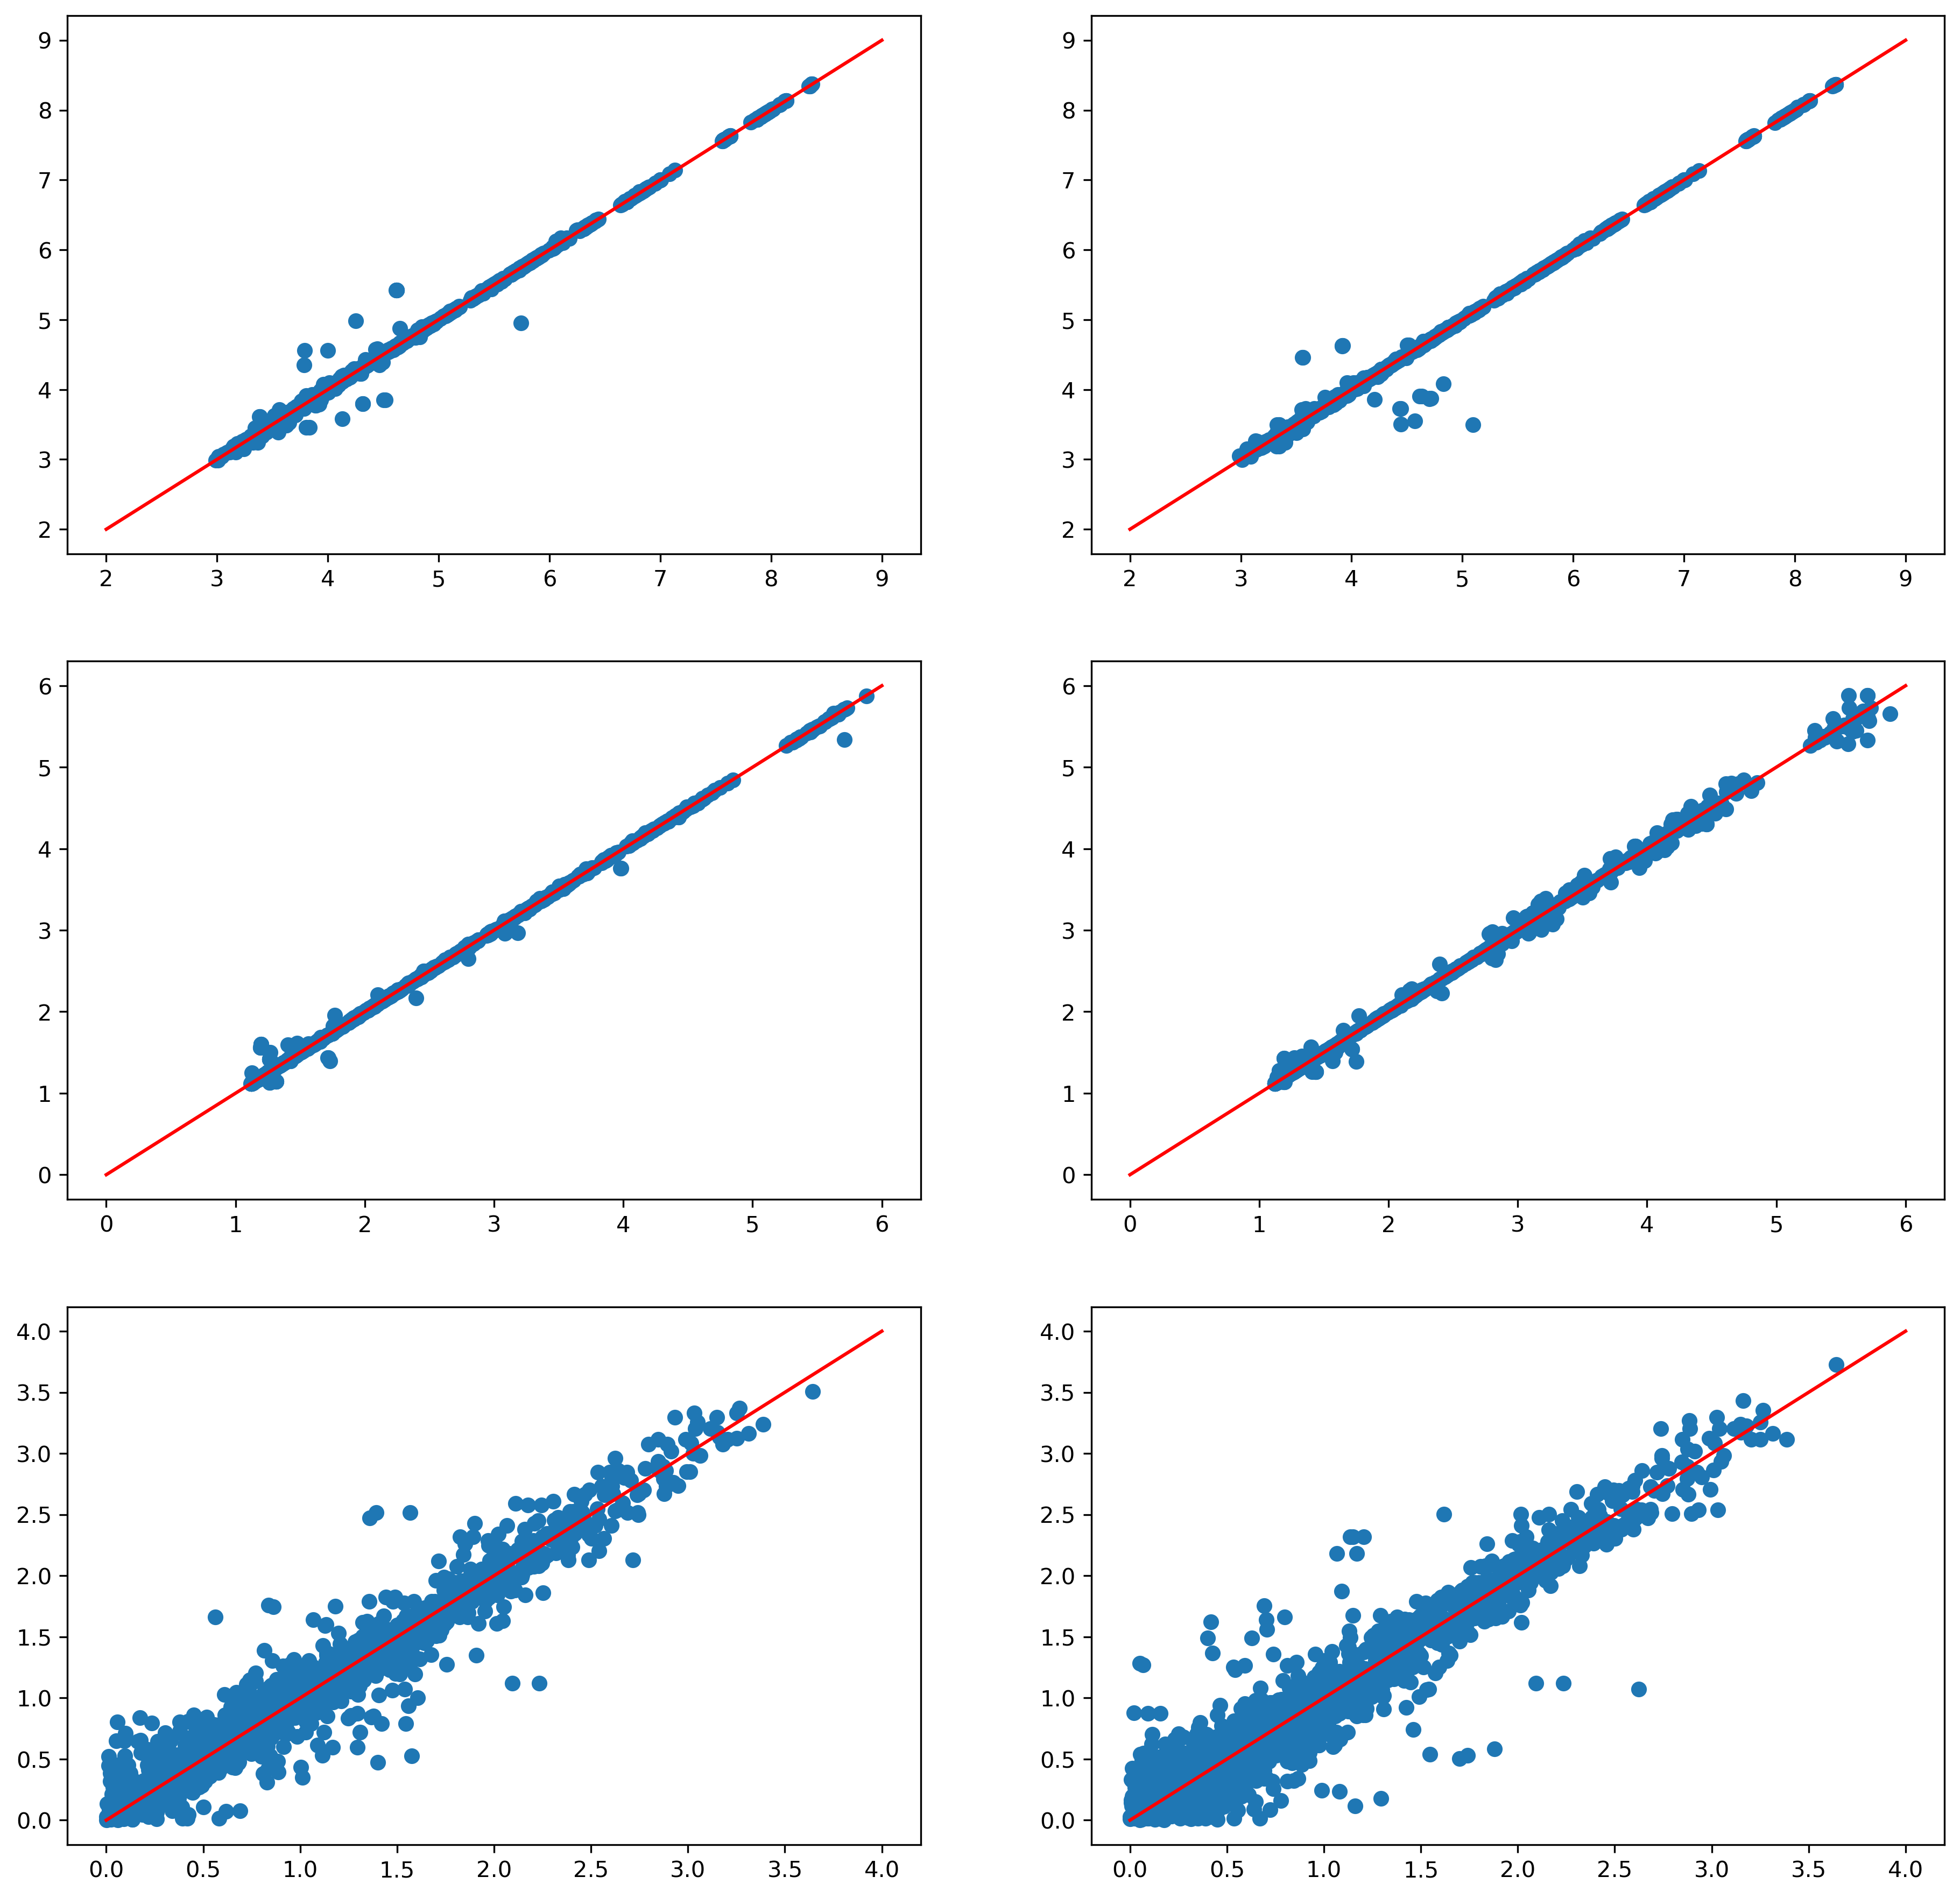

<Figure size 432x288 with 0 Axes>

In [48]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,15), dpi=300)
fig = plt.figure()

axes[0,0].plot(np.arange(2,10), np.arange(2,10), color = "red")
axes[0,0].scatter(y_test["SRD (MJ/kg CO2)"], DTmodelA_pred[: , 0])
axes[0,1].plot(np.arange(2,10), np.arange(2,10), color = "red")
axes[0,1].scatter(y_test["SRD (MJ/kg CO2)"], DTmodelN_pred[: , 0])

axes[1,0].plot(np.arange(0,7), np.arange(0,7), color = "red")
axes[1,0].scatter(y_test['Condensor Specific Duty'], DTmodelA_pred[: , 1])
axes[1,1].plot(np.arange(0,7), np.arange(0,7), color = "red")
axes[1,1].scatter(y_test['Condensor Specific Duty'], DTmodelN_pred[: , 1])

axes[2,0].plot(np.arange(0,5), np.arange(0,5), color = "red")
axes[2,0].scatter(y_test['SCD (MJ/kg)'], DTmodelA_pred[: , 2])
axes[2,1].plot(np.arange(0,5), np.arange(0,5), color = "red")
axes[2,1].scatter(y_test['SCD (MJ/kg)'], DTmodelN_pred[: , 2])

## Gradient Boosting

In [49]:
from sklearn.ensemble import GradientBoostingRegressor

In [50]:
GBmodelA = MultiOutputRegressor(GradientBoostingRegressor(learning_rate=0.2, n_estimators=1500)).fit(XA_train, y_train)
GBmodelN = MultiOutputRegressor(GradientBoostingRegressor(learning_rate=0.2, n_estimators=1500)).fit(XN_train, y_train)

In [51]:
GBmodelA_pred = GBmodelA.predict(XA_test)
GBmodelN_pred = GBmodelN.predict(XN_test)

In [52]:
pdict1["R^2_A"].append(r2_score(y_test["SRD (MJ/kg CO2)"], GBmodelA_pred[: , 0]))
pdict1["MAE_A"].append(mean_absolute_error(y_test["SRD (MJ/kg CO2)"], GBmodelA_pred[: , 0]))
pdict1["MAPE_A"].append(mean_absolute_percentage_error(y_test["SRD (MJ/kg CO2)"], GBmodelA_pred[: , 0]))
pdict1["RMSE_A"].append(np.sqrt(mean_squared_error(y_test["SRD (MJ/kg CO2)"], GBmodelA_pred[: , 0])))
pdict1["R^2_N"].append(r2_score(y_test["SRD (MJ/kg CO2)"], GBmodelN_pred[: , 0]))
pdict1["MAE_N"].append(mean_absolute_error(y_test["SRD (MJ/kg CO2)"], GBmodelN_pred[: , 0]))
pdict1["MAPE_N"].append(mean_absolute_percentage_error(y_test["SRD (MJ/kg CO2)"], GBmodelN_pred[: , 0]))
pdict1["RMSE_N"].append(np.sqrt(mean_squared_error(y_test["SRD (MJ/kg CO2)"], GBmodelN_pred[: , 0])))

In [53]:
pdict2["R^2_A"].append(r2_score(y_test["Condensor Specific Duty"], GBmodelA_pred[: , 1]))
pdict2["MAE_A"].append(mean_absolute_error(y_test["Condensor Specific Duty"], GBmodelA_pred[: , 1]))
pdict2["MAPE_A"].append(mean_absolute_percentage_error(y_test["Condensor Specific Duty"], GBmodelA_pred[: , 1]))
pdict2["RMSE_A"].append(np.sqrt(mean_squared_error(y_test["Condensor Specific Duty"], GBmodelA_pred[: , 1])))
pdict2["R^2_N"].append(r2_score(y_test["Condensor Specific Duty"], GBmodelN_pred[: , 1]))
pdict2["MAE_N"].append(mean_absolute_error(y_test["Condensor Specific Duty"], GBmodelN_pred[: , 1]))
pdict2["MAPE_N"].append(mean_absolute_percentage_error(y_test["Condensor Specific Duty"], GBmodelN_pred[: , 1]))
pdict2["RMSE_N"].append(np.sqrt(mean_squared_error(y_test["Condensor Specific Duty"], GBmodelN_pred[: , 1])))

In [54]:
pdict3["R^2_A"].append(r2_score(y_test["SCD (MJ/kg)"], GBmodelA_pred[: , 2]))
pdict3["MAE_A"].append(mean_absolute_error(y_test["SCD (MJ/kg)"], GBmodelA_pred[: , 2]))
pdict3["MAPE_A"].append(mean_absolute_percentage_error(y_test["SCD (MJ/kg)"], GBmodelA_pred[: , 2]))
pdict3["RMSE_A"].append(np.sqrt(mean_squared_error(y_test["SCD (MJ/kg)"], GBmodelA_pred[: , 2])))
pdict3["R^2_N"].append(r2_score(y_test["SCD (MJ/kg)"], GBmodelN_pred[: , 2]))
pdict3["MAE_N"].append(mean_absolute_error(y_test["SCD (MJ/kg)"], GBmodelN_pred[: , 2]))
pdict3["MAPE_N"].append(mean_absolute_percentage_error(y_test["SCD (MJ/kg)"], GBmodelN_pred[: , 2]))
pdict3["RMSE_N"].append(np.sqrt(mean_squared_error(y_test["SCD (MJ/kg)"], GBmodelN_pred[: , 2])))

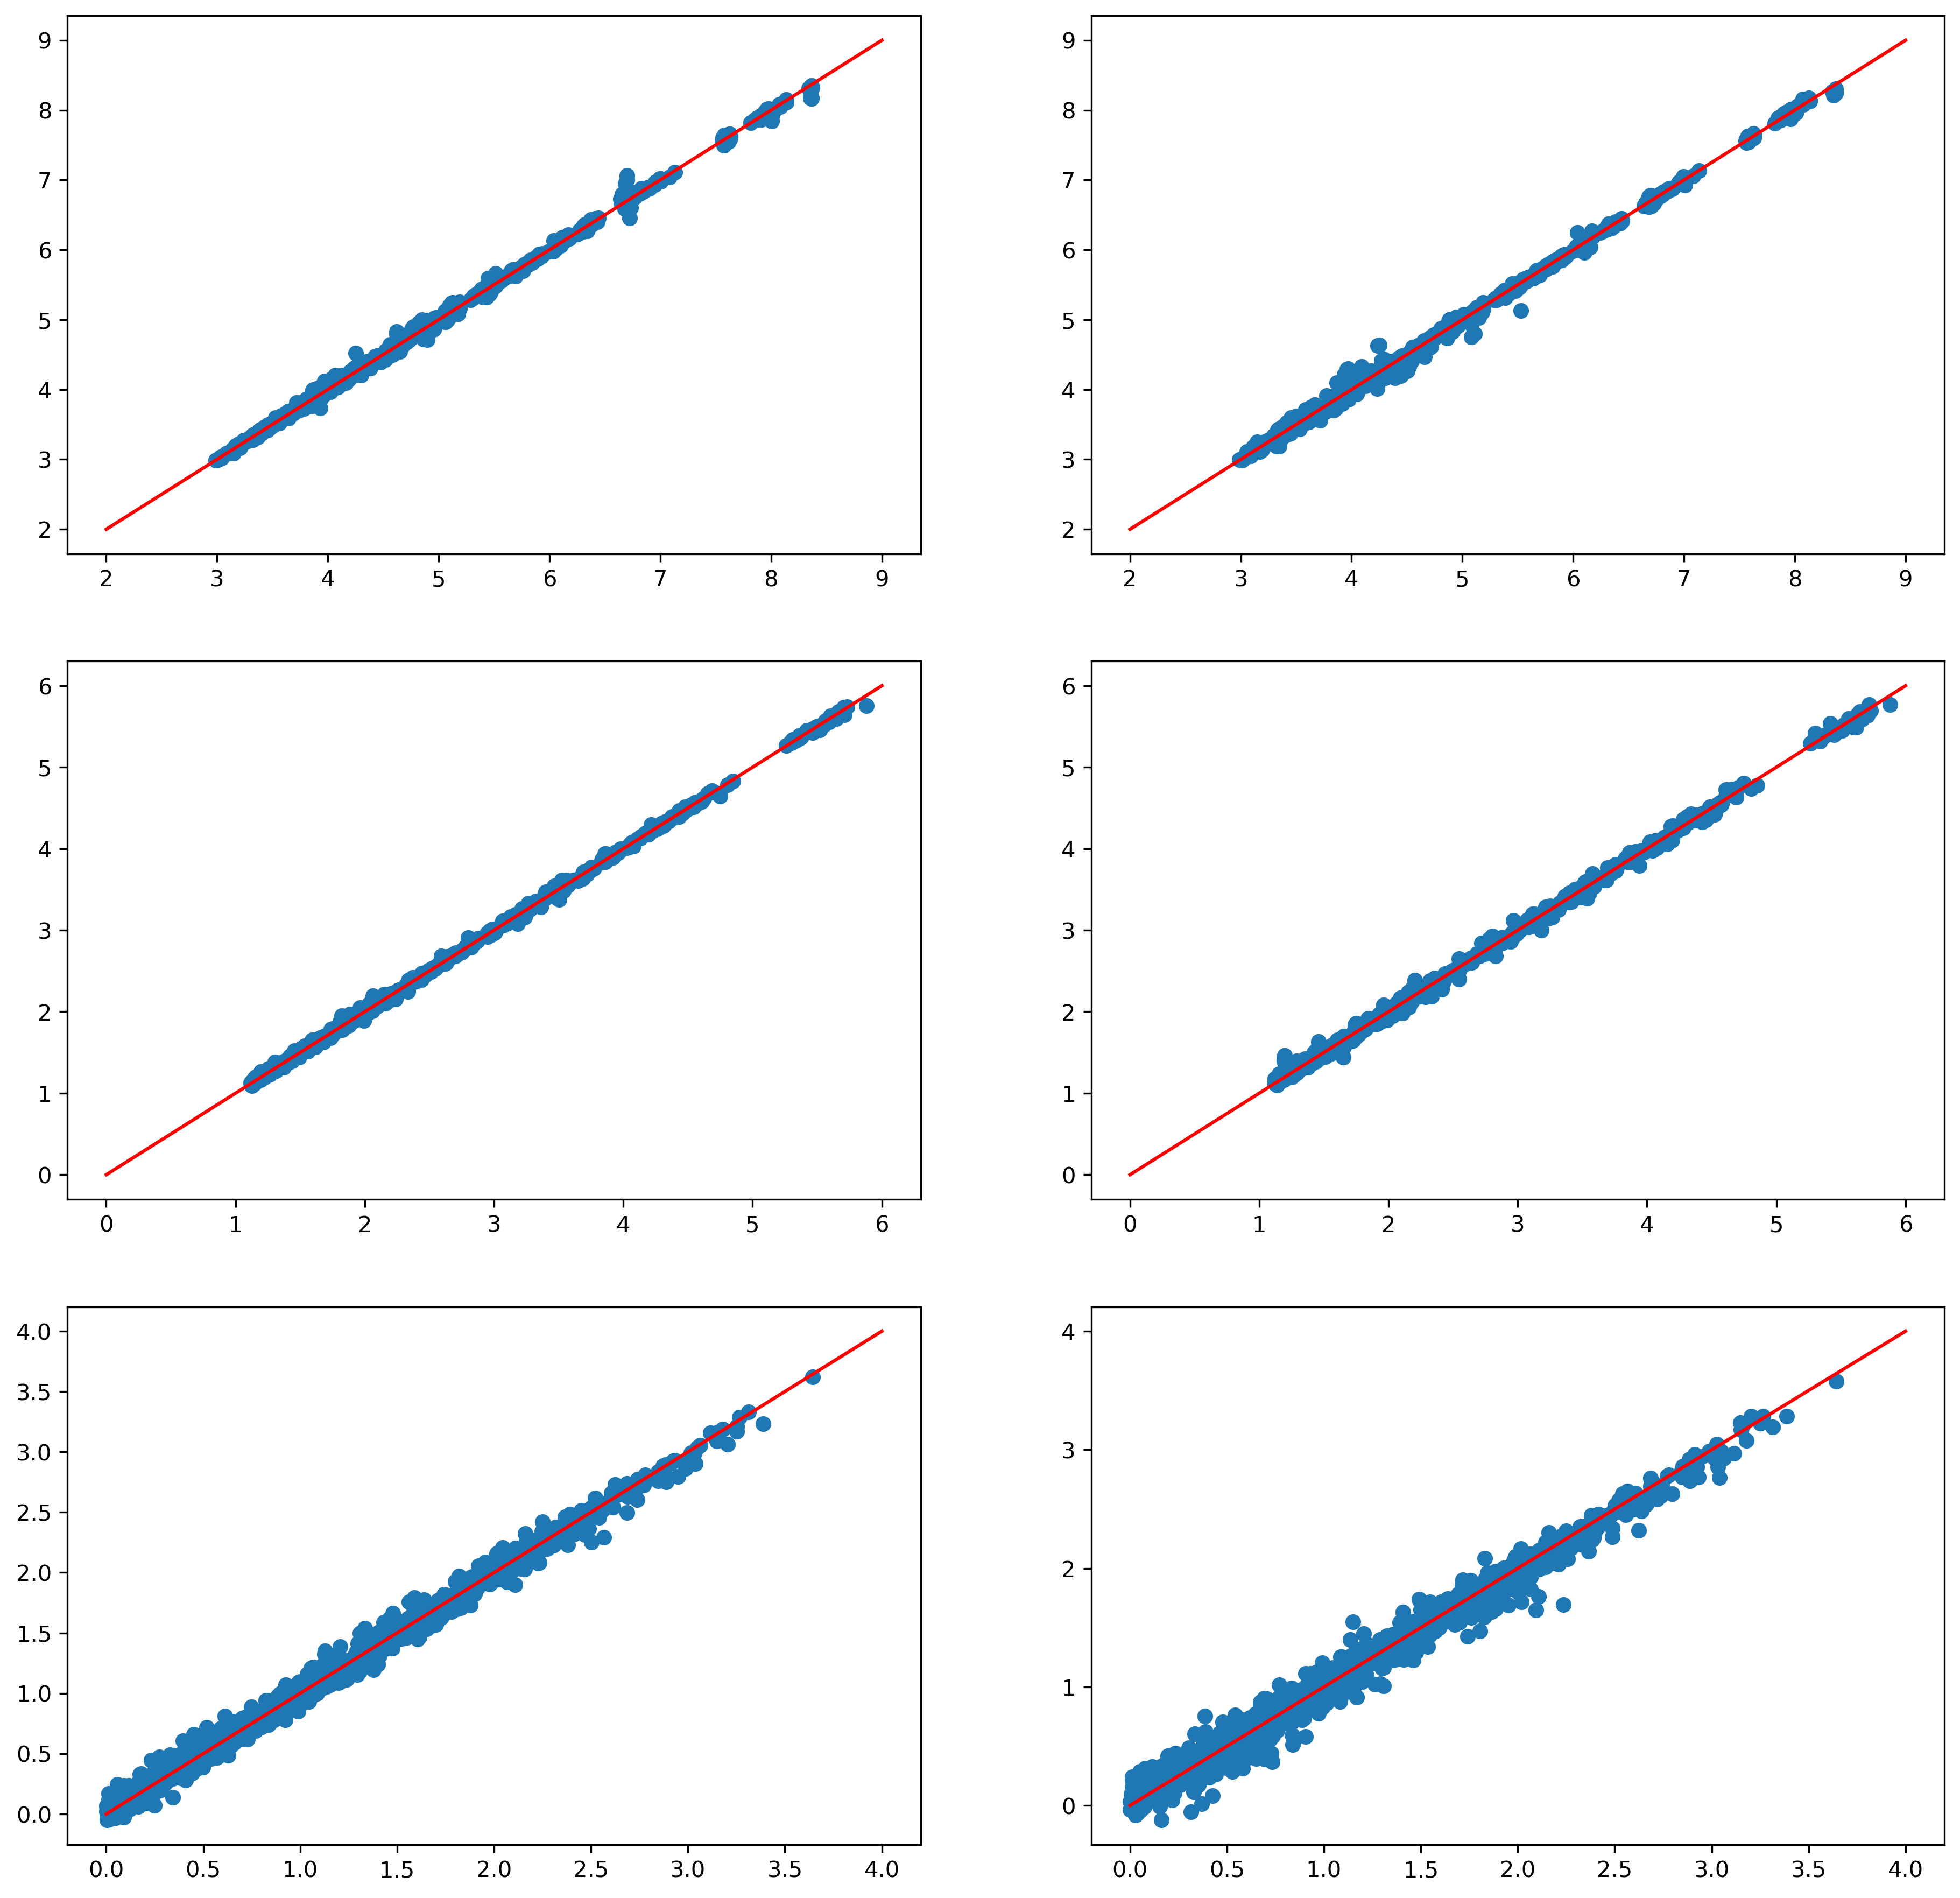

<Figure size 432x288 with 0 Axes>

In [55]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,15), dpi=300)
fig = plt.figure()

axes[0,0].plot(np.arange(2,10), np.arange(2,10), color = "red")
axes[0,0].scatter(y_test["SRD (MJ/kg CO2)"], GBmodelA_pred[: , 0])
axes[0,1].plot(np.arange(2,10), np.arange(2,10), color = "red")
axes[0,1].scatter(y_test["SRD (MJ/kg CO2)"], GBmodelN_pred[: , 0])

axes[1,0].plot(np.arange(0,7), np.arange(0,7), color = "red")
axes[1,0].scatter(y_test['Condensor Specific Duty'], GBmodelA_pred[: , 1])
axes[1,1].plot(np.arange(0,7), np.arange(0,7), color = "red")
axes[1,1].scatter(y_test['Condensor Specific Duty'], GBmodelN_pred[: , 1])

axes[2,0].plot(np.arange(0,5), np.arange(0,5), color = "red")
axes[2,0].scatter(y_test['SCD (MJ/kg)'], GBmodelA_pred[: , 2])
axes[2,1].plot(np.arange(0,5), np.arange(0,5), color = "red")
axes[2,1].scatter(y_test['SCD (MJ/kg)'], GBmodelN_pred[: , 2])

## ANN

In [56]:
import tensorflow as tf

In [57]:
scalerA = StandardScaler()
scalerA.fit(XA_train)
XA_train_s = scalerA.transform(XA_train)
XA_test_s = scalerA.transform(XA_test)

In [58]:
scalerN = StandardScaler()
scalerN.fit(XN_train)
XN_train_s = scalerN.transform(XN_train)
XN_test_s = scalerN.transform(XN_test)

In [59]:
ANmodelA = tf.keras.Sequential()

ANmodelA.add(tf.keras.layers.Dense(25, input_dim=XA_train_s.shape[1], activation='relu'))
ANmodelA.add(tf.keras.layers.Dense(25, activation='relu'))
ANmodelA.add(tf.keras.layers.Dense(25, activation='relu'))
ANmodelA.add(tf.keras.layers.Dense(3))

ANmodelA.compile(loss="mean_squared_error", optimizer="adam")

In [60]:
ANmodelN = tf.keras.Sequential()

ANmodelN.add(tf.keras.layers.Dense(25, input_dim=XN_train_s.shape[1], activation='relu'))
ANmodelN.add(tf.keras.layers.Dense(25, activation='relu'))
ANmodelN.add(tf.keras.layers.Dense(25, activation='relu'))
ANmodelN.add(tf.keras.layers.Dense(3))

ANmodelN.compile(loss="mean_squared_error", optimizer="adam")

In [61]:
ANmodelA.fit(XA_train_s, y_train, epochs= 300)

Epoch 1/300
125/125 [==============================] - 0s 736us/step - loss: 5.7989
Epoch 2/300
125/125 [==============================] - 0s 751us/step - loss: 0.4473
Epoch 3/300
125/125 [==============================] - 0s 613us/step - loss: 0.2847
Epoch 4/300
125/125 [==============================] - 0s 576us/step - loss: 0.2081
Epoch 5/300
125/125 [==============================] - 0s 580us/step - loss: 0.1703
Epoch 6/300
125/125 [==============================] - 0s 848us/step - loss: 0.1460
Epoch 7/300
125/125 [==============================] - 0s 616us/step - loss: 0.1283
Epoch 8/300
125/125 [==============================] - 0s 668us/step - loss: 0.1128
Epoch 9/300
125/125 [==============================] - 0s 708us/step - loss: 0.0981
Epoch 10/300
125/125 [==============================] - 0s 683us/step - loss: 0.0865
Epoch 11/300
125/125 [==============================] - 0s 744us/step - loss: 0.0764
Epoch 12/300
125/125 [==============================] - 0s 565us/step - lo

125/125 [==============================] - 0s 658us/step - loss: 0.0016
Epoch 193/300
125/125 [==============================] - 0s 675us/step - loss: 0.0018
Epoch 194/300
125/125 [==============================] - 0s 624us/step - loss: 0.0015
Epoch 195/300
125/125 [==============================] - 0s 784us/step - loss: 0.0016
Epoch 196/300
125/125 [==============================] - 0s 574us/step - loss: 0.0016
Epoch 197/300
125/125 [==============================] - 0s 567us/step - loss: 0.0016
Epoch 198/300
125/125 [==============================] - 0s 699us/step - loss: 0.0016
Epoch 199/300
125/125 [==============================] - 0s 743us/step - loss: 0.0016
Epoch 200/300
125/125 [==============================] - 0s 681us/step - loss: 0.0015
Epoch 201/300
125/125 [==============================] - 0s 591us/step - loss: 0.0016
Epoch 202/300
125/125 [==============================] - 0s 563us/step - loss: 0.0015
Epoch 203/300
125/125 [==============================] - 0s 831us/st

In [62]:
ANmodelN.fit(XN_train_s, y_train, epochs= 300)

Epoch 1/300
125/125 [==============================] - 0s 777us/step - loss: 3.6611
Epoch 2/300
125/125 [==============================] - 0s 618us/step - loss: 0.3760
Epoch 3/300
125/125 [==============================] - 0s 587us/step - loss: 0.2599
Epoch 4/300
125/125 [==============================] - 0s 697us/step - loss: 0.2032
Epoch 5/300
125/125 [==============================] - 0s 586us/step - loss: 0.1664
Epoch 6/300
125/125 [==============================] - 0s 579us/step - loss: 0.1413
Epoch 7/300
125/125 [==============================] - 0s 861us/step - loss: 0.1219
Epoch 8/300
125/125 [==============================] - 0s 728us/step - loss: 0.1052
Epoch 9/300
125/125 [==============================] - 0s 687us/step - loss: 0.0915
Epoch 10/300
125/125 [==============================] - 0s 638us/step - loss: 0.0795
Epoch 11/300
125/125 [==============================] - 0s 572us/step - loss: 0.0704
Epoch 12/300
125/125 [==============================] - 0s 702us/step - lo

125/125 [==============================] - 0s 684us/step - loss: 0.0232
Epoch 193/300
125/125 [==============================] - 0s 718us/step - loss: 0.0237
Epoch 194/300
125/125 [==============================] - 0s 568us/step - loss: 0.0232
Epoch 195/300
125/125 [==============================] - 0s 673us/step - loss: 0.0227
Epoch 196/300
125/125 [==============================] - 0s 569us/step - loss: 0.0229
Epoch 197/300
125/125 [==============================] - 0s 804us/step - loss: 0.0237
Epoch 198/300
125/125 [==============================] - 0s 575us/step - loss: 0.0232
Epoch 199/300
125/125 [==============================] - 0s 568us/step - loss: 0.0229
Epoch 200/300
125/125 [==============================] - 0s 838us/step - loss: 0.0227
Epoch 201/300
125/125 [==============================] - 0s 572us/step - loss: 0.0235
Epoch 202/300
125/125 [==============================] - 0s 681us/step - loss: 0.0227
Epoch 203/300
125/125 [==============================] - 0s 555us/st

In [63]:
ANmodelA_pred = ANmodelA.predict(XA_test_s)
ANmodelN_pred = ANmodelN.predict(XN_test_s)

In [64]:
pdict1["R^2_A"].append(r2_score(y_test["SRD (MJ/kg CO2)"], ANmodelA_pred[: , 0]))
pdict1["MAE_A"].append(mean_absolute_error(y_test["SRD (MJ/kg CO2)"], ANmodelA_pred[: , 0]))
pdict1["MAPE_A"].append(mean_absolute_percentage_error(y_test["SRD (MJ/kg CO2)"], ANmodelA_pred[: , 0]))
pdict1["RMSE_A"].append(np.sqrt(mean_squared_error(y_test["SRD (MJ/kg CO2)"], ANmodelA_pred[: , 0])))
pdict1["R^2_N"].append(r2_score(y_test["SRD (MJ/kg CO2)"], ANmodelN_pred[: , 0]))
pdict1["MAE_N"].append(mean_absolute_error(y_test["SRD (MJ/kg CO2)"], ANmodelN_pred[: , 0]))
pdict1["MAPE_N"].append(mean_absolute_percentage_error(y_test["SRD (MJ/kg CO2)"], ANmodelN_pred[: , 0]))
pdict1["RMSE_N"].append(np.sqrt(mean_squared_error(y_test["SRD (MJ/kg CO2)"], ANmodelN_pred[: , 0])))

In [65]:
pdict2["R^2_A"].append(r2_score(y_test["Condensor Specific Duty"], ANmodelA_pred[: , 1]))
pdict2["MAE_A"].append(mean_absolute_error(y_test["Condensor Specific Duty"], ANmodelA_pred[: , 1]))
pdict2["MAPE_A"].append(mean_absolute_percentage_error(y_test["Condensor Specific Duty"], ANmodelA_pred[: , 1]))
pdict2["RMSE_A"].append(np.sqrt(mean_squared_error(y_test["Condensor Specific Duty"], ANmodelA_pred[: , 1])))
pdict2["R^2_N"].append(r2_score(y_test["Condensor Specific Duty"], ANmodelN_pred[: , 1]))
pdict2["MAE_N"].append(mean_absolute_error(y_test["Condensor Specific Duty"], ANmodelN_pred[: , 1]))
pdict2["MAPE_N"].append(mean_absolute_percentage_error(y_test["Condensor Specific Duty"], ANmodelN_pred[: , 1]))
pdict2["RMSE_N"].append(np.sqrt(mean_squared_error(y_test["Condensor Specific Duty"], ANmodelN_pred[: , 1])))

In [66]:
pdict3["R^2_A"].append(r2_score(y_test["SCD (MJ/kg)"], ANmodelA_pred[: , 2]))
pdict3["MAE_A"].append(mean_absolute_error(y_test["SCD (MJ/kg)"], ANmodelA_pred[: , 2]))
pdict3["MAPE_A"].append(mean_absolute_percentage_error(y_test["SCD (MJ/kg)"], ANmodelA_pred[: , 2]))
pdict3["RMSE_A"].append(np.sqrt(mean_squared_error(y_test["SCD (MJ/kg)"], ANmodelA_pred[: , 2])))
pdict3["R^2_N"].append(r2_score(y_test["SCD (MJ/kg)"], ANmodelN_pred[: , 2]))
pdict3["MAE_N"].append(mean_absolute_error(y_test["SCD (MJ/kg)"], ANmodelN_pred[: , 2]))
pdict3["MAPE_N"].append(mean_absolute_percentage_error(y_test["SCD (MJ/kg)"], ANmodelN_pred[: , 2]))
pdict3["RMSE_N"].append(np.sqrt(mean_squared_error(y_test["SCD (MJ/kg)"], ANmodelN_pred[: , 2])))

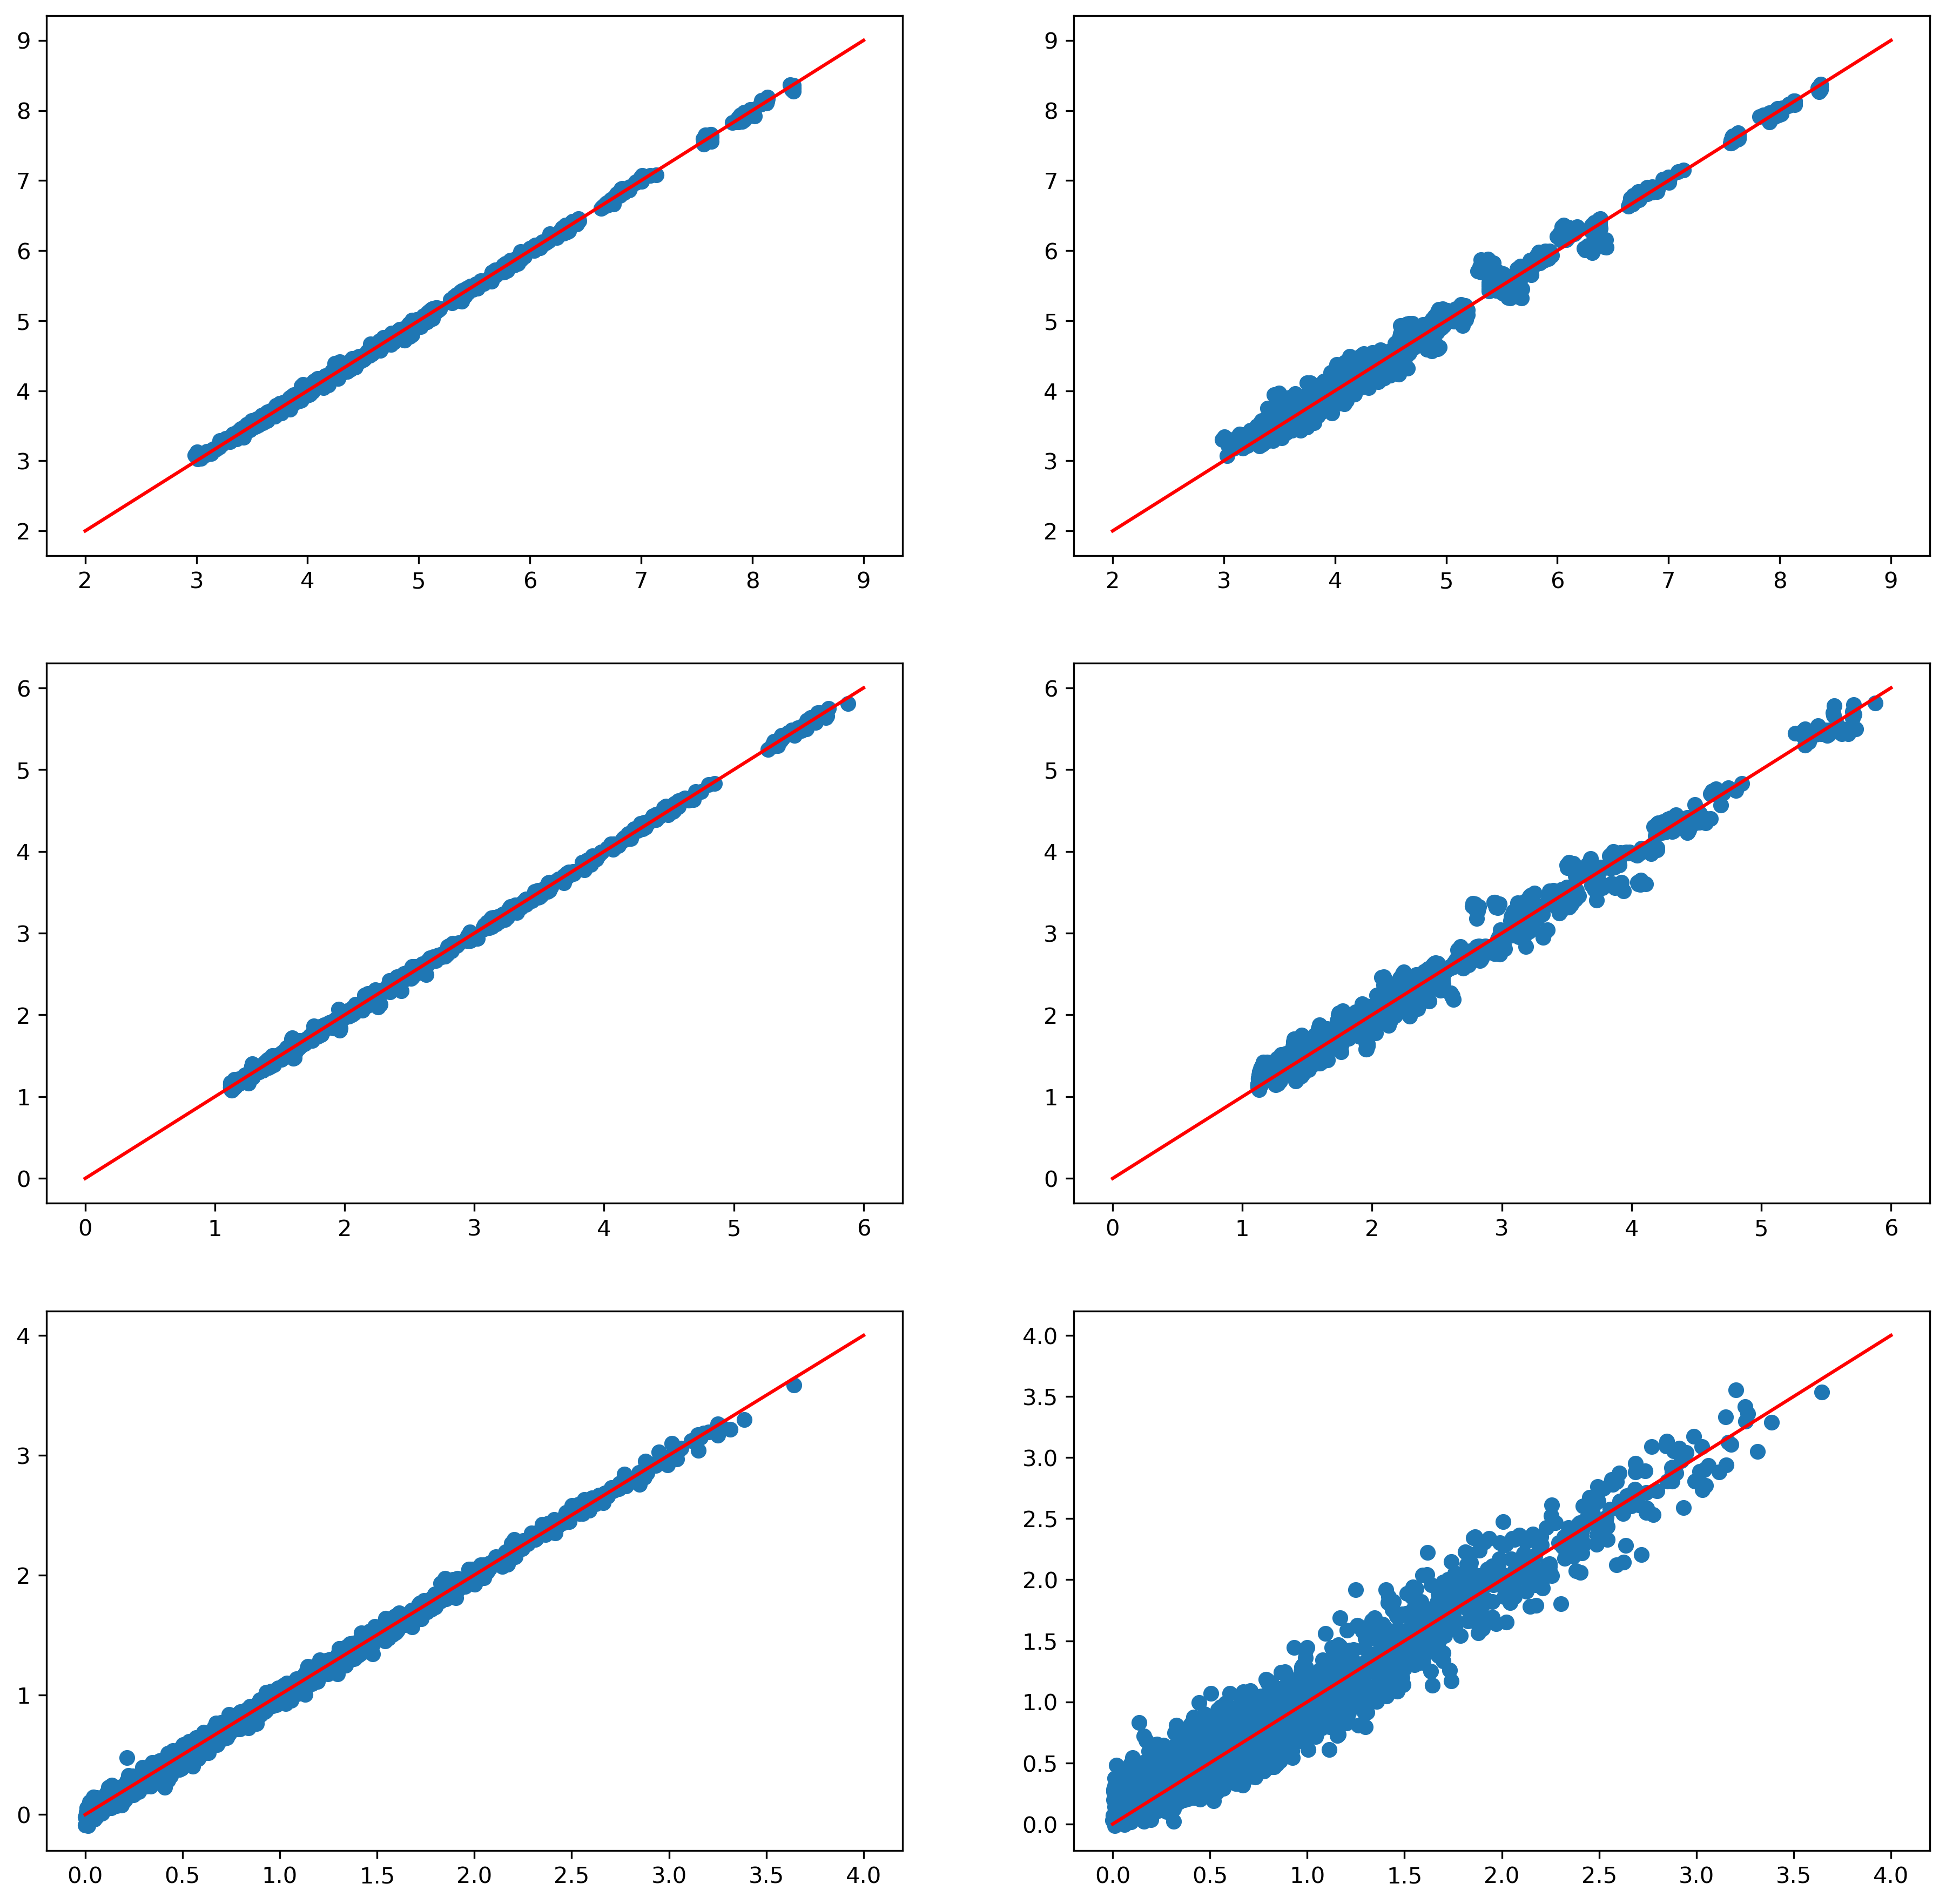

<Figure size 432x288 with 0 Axes>

In [67]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,15), dpi=300)
fig = plt.figure()

axes[0,0].plot(np.arange(2,10), np.arange(2,10), color = "red")
axes[0,0].scatter(y_test["SRD (MJ/kg CO2)"], ANmodelA_pred[: , 0])
axes[0,1].plot(np.arange(2,10), np.arange(2,10), color = "red")
axes[0,1].scatter(y_test["SRD (MJ/kg CO2)"], ANmodelN_pred[: , 0])

axes[1,0].plot(np.arange(0,7), np.arange(0,7), color = "red")
axes[1,0].scatter(y_test['Condensor Specific Duty'], ANmodelA_pred[: , 1])
axes[1,1].plot(np.arange(0,7), np.arange(0,7), color = "red")
axes[1,1].scatter(y_test['Condensor Specific Duty'], ANmodelN_pred[: , 1])

axes[2,0].plot(np.arange(0,5), np.arange(0,5), color = "red")
axes[2,0].scatter(y_test['SCD (MJ/kg)'], ANmodelA_pred[: , 2])
axes[2,1].plot(np.arange(0,5), np.arange(0,5), color = "red")
axes[2,1].scatter(y_test['SCD (MJ/kg)'], ANmodelN_pred[: , 2])

## XGboost

In [134]:
import xgboost as xgb

In [136]:
XGBmodelA = xgb.XGBRFRegressor().fit(XA_train, y_train)
XGBmodelN = xgb.XGBRFRegressor().fit(XN_train, y_train)

In [137]:
XGBmodelA_pred = XGBmodelA.predict(XA_test)
XGBmodelN_pred = XGBmodelN.predict(XN_test)

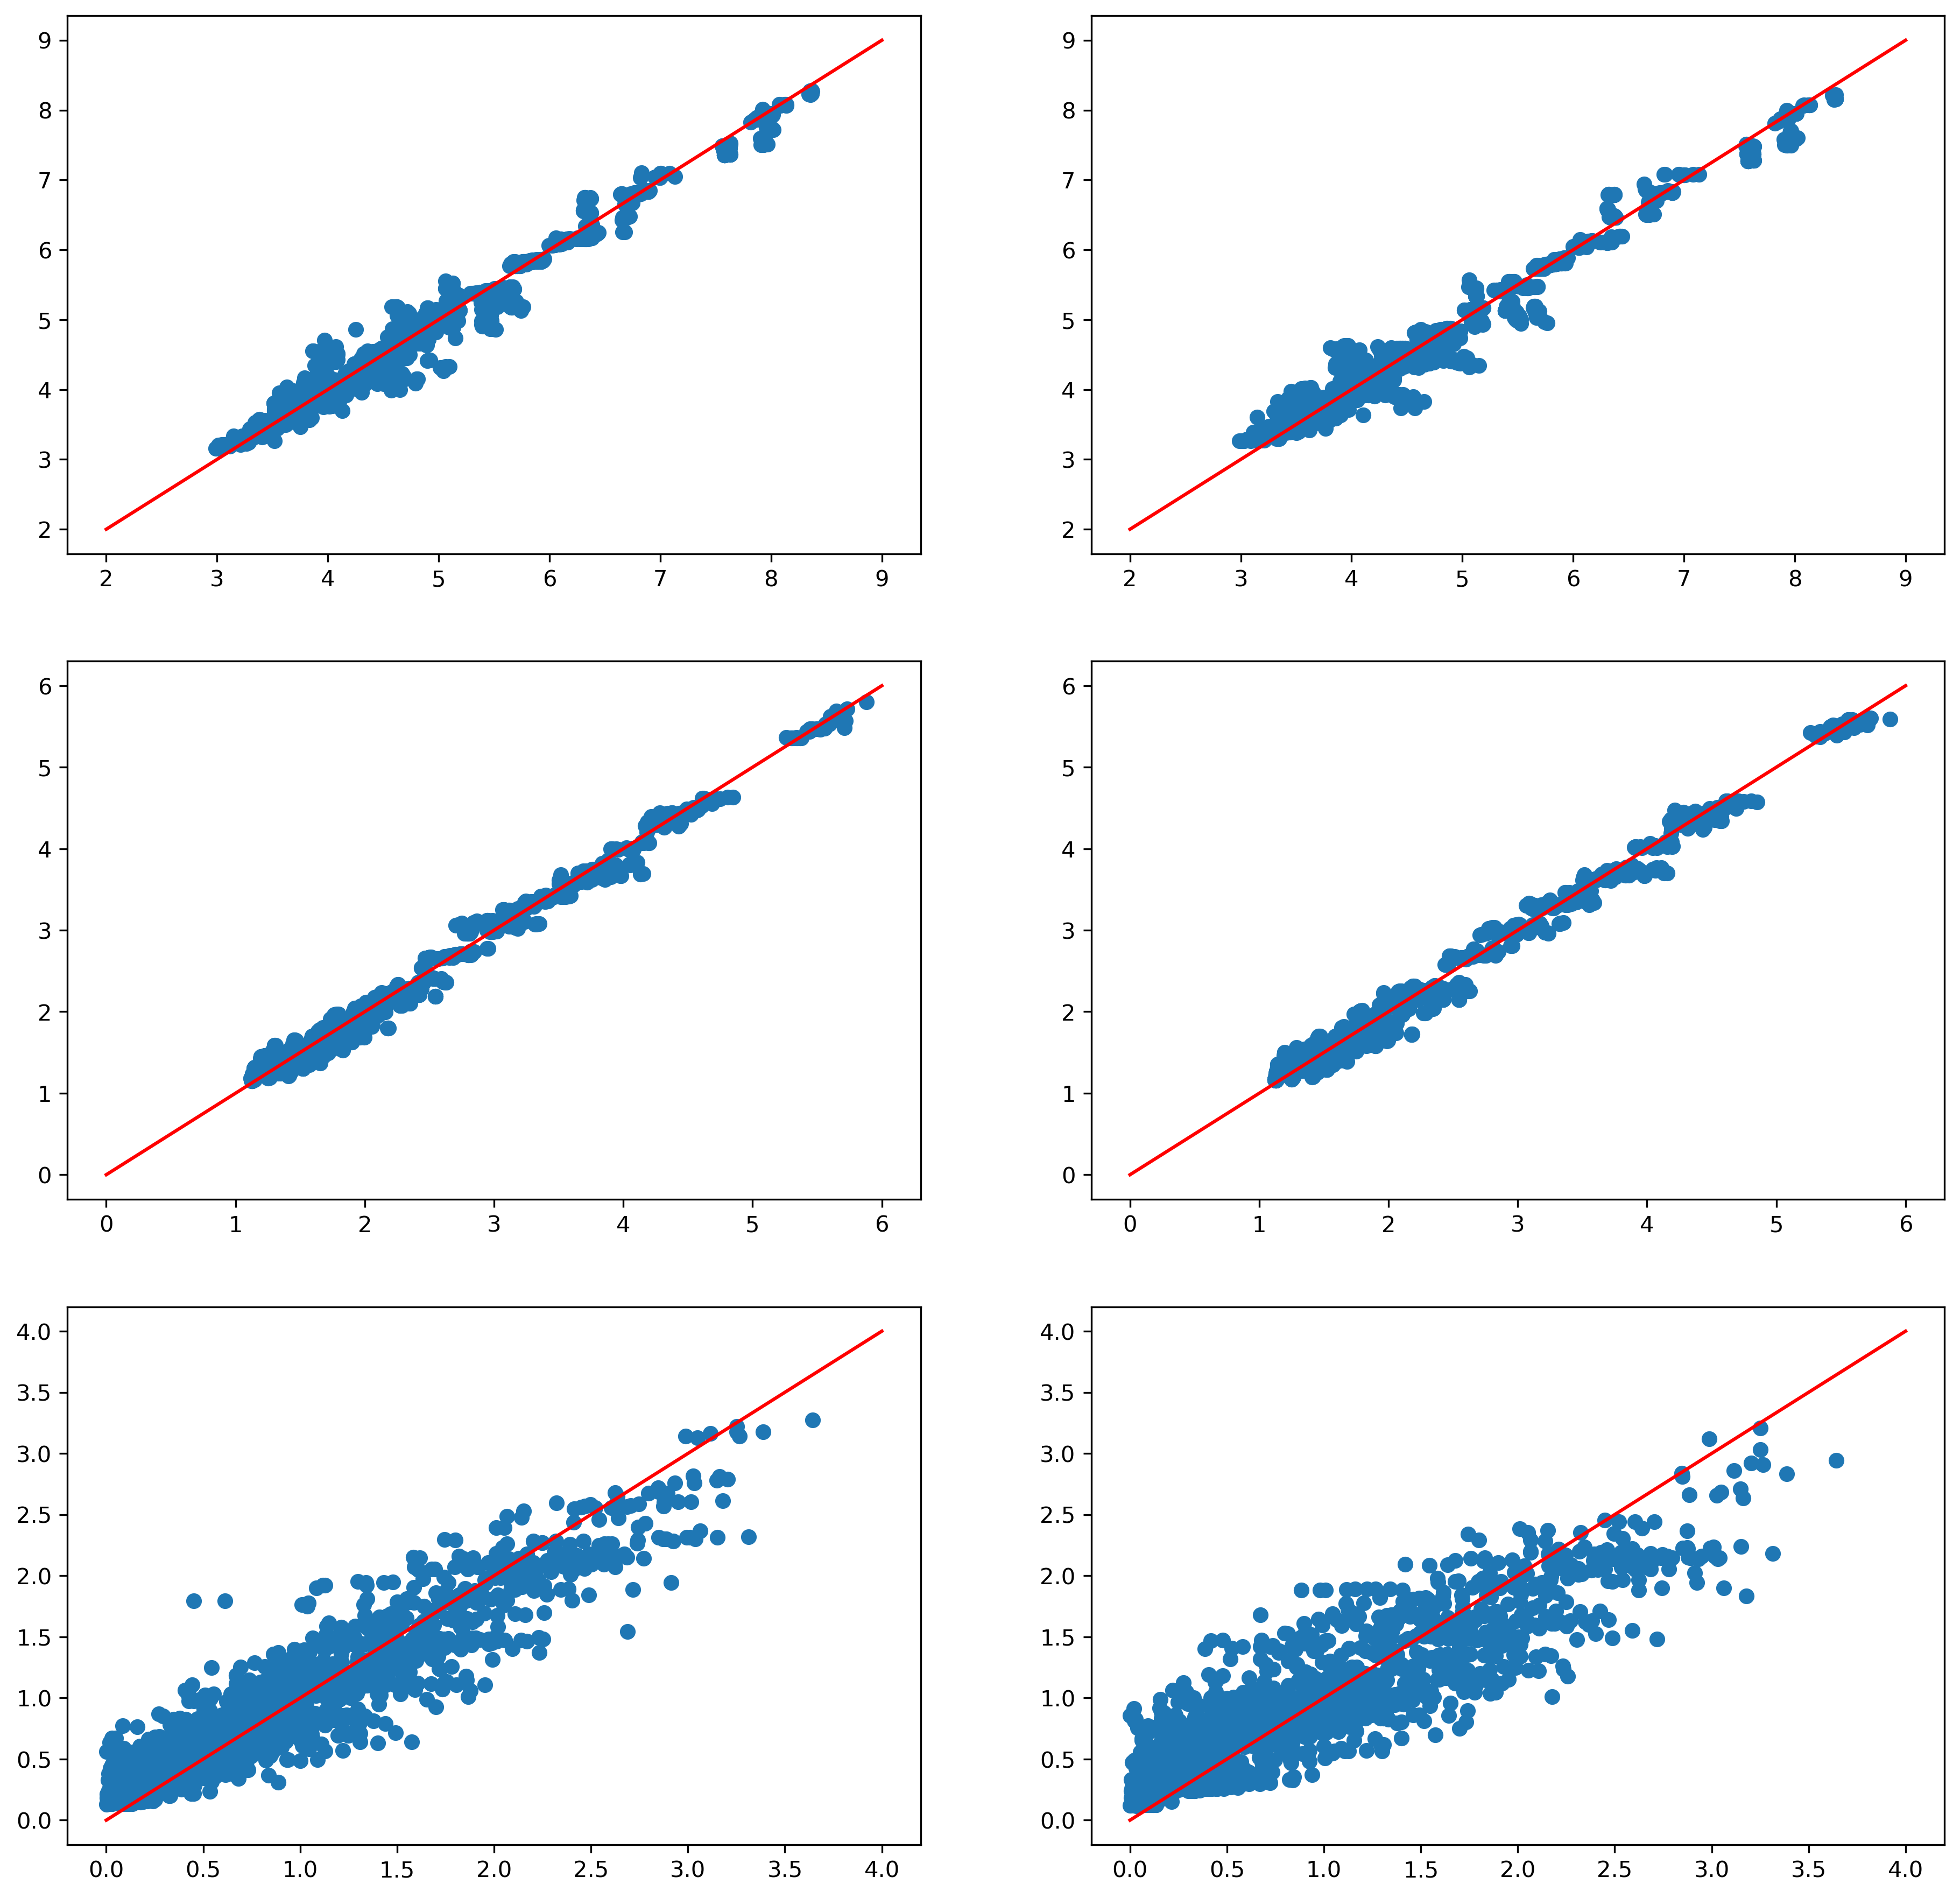

<Figure size 432x288 with 0 Axes>

In [138]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,15), dpi=300)
fig = plt.figure()

axes[0,0].plot(np.arange(2,10), np.arange(2,10), color = "red")
axes[0,0].scatter(y_test["SRD (MJ/kg CO2)"], XGBmodelA_pred[: , 0])
axes[0,1].plot(np.arange(2,10), np.arange(2,10), color = "red")
axes[0,1].scatter(y_test["SRD (MJ/kg CO2)"], XGBmodelN_pred[: , 0])

axes[1,0].plot(np.arange(0,7), np.arange(0,7), color = "red")
axes[1,0].scatter(y_test['Condensor Specific Duty'], XGBmodelA_pred[: , 1])
axes[1,1].plot(np.arange(0,7), np.arange(0,7), color = "red")
axes[1,1].scatter(y_test['Condensor Specific Duty'], XGBmodelN_pred[: , 1])

axes[2,0].plot(np.arange(0,5), np.arange(0,5), color = "red")
axes[2,0].scatter(y_test['SCD (MJ/kg)'], XGBmodelA_pred[: , 2])
axes[2,1].plot(np.arange(0,5), np.arange(0,5), color = "red")
axes[2,1].scatter(y_test['SCD (MJ/kg)'], XGBmodelN_pred[: , 2])

In [ ]:
xgb.cv()

In [68]:
pd.DataFrame(pdict1)

R^2_A     MAE_A    MAPE_A    RMSE_A     R^2_N     MAE_N    MAPE_N  \
0  0.770981  0.460799  0.095145  0.595463  0.762377  0.475911  0.098839   
1  0.999598  0.012850  0.002693  0.024947  0.989430  0.087216  0.020506   
2  0.997027  0.016701  0.004066  0.067839  0.995061  0.016654  0.004047   
3  0.999135  0.021525  0.004586  0.036589  0.998422  0.029512  0.006740   
4  0.999233  0.026727  0.005934  0.034461  0.989005  0.094560  0.021598   

     RMSE_N  
0  0.606545  
1  0.127927  
2  0.087450  
3  0.049425  
4  0.130473

In [69]:
pd.DataFrame(pdict2)

R^2_A     MAE_A    MAPE_A    RMSE_A     R^2_N     MAE_N    MAPE_N  \
0  0.754278  0.420583  0.216392  0.541042  0.731907  0.439423  0.230477   
1  0.999514  0.012002  0.006013  0.024067  0.984800  0.108859  0.060950   
2  0.999085  0.007419  0.004068  0.033007  0.998471  0.014779  0.005461   
3  0.999658  0.013243  0.006990  0.020175  0.998949  0.021809  0.011128   
4  0.999280  0.021558  0.011739  0.029296  0.983293  0.109299  0.059056   

     RMSE_N  
0  0.565135  
1  0.134566  
2  0.042680  
3  0.035377  
4  0.141076

In [70]:
pd.DataFrame(pdict3)

R^2_A     MAE_A    MAPE_A    RMSE_A     R^2_N     MAE_N    MAPE_N  \
0  0.864110  0.209990  1.021081  0.265856  0.675637  0.326321  1.563443   
1  0.999874  0.004913  0.034872  0.008088  0.913802  0.169962  0.733538   
2  0.942428  0.108579  0.364077  0.173043  0.902578  0.153280  0.610753   
3  0.994007  0.039977  0.183325  0.055828  0.985072  0.063765  0.295361   
4  0.996825  0.031496  0.174390  0.040635  0.928877  0.155552  0.710265   

     RMSE_N  
0  0.410740  
1  0.211739  
2  0.225102  
3  0.088115  
4  0.192334

### Some initial evaluations

In [71]:
XA = df[["FG Temperature", "Lean Loading",'Lean Amine Temperature','L/G (kg/kg)','Flue gas CO2 cons','CO2 Capture Efficiency','LMTD','Abs Height']]

In [72]:
inp = np.array([30.1,0.318,54,4.46,0.137,90,9.79,18])

In [73]:
XA_train.iloc[0]

FG Temperature            50.0000
Lean Loading               0.2714
Lean Amine Temperature    30.0000
L/G (kg/kg)                4.1630
Flue gas CO2 cons          0.1324
CO2 Capture Efficiency    93.3100
LMTD                      12.0800
Abs Height                18.0000
Name: 4824, dtype: float64

In [74]:
type(inp)

numpy.ndarray

In [75]:
type(XA_train.iloc[0])

pandas.core.series.Series

In [76]:
inps = pd.Series(inp)

In [77]:
inps.shape

(8,)

In [78]:
XA_train.iloc[0].shape

(8,)

In [79]:
inp = np.array([40,0.25,35,3.6,0.1175,90.14,19.23,30])

In [80]:
SVmodelA.predict(inp.reshape(1, -1))

C:\Users\z110474\Anaconda3\envs\ML\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\z110474\Anaconda3\envs\ML\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\z110474\Anaconda3\envs\ML\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[5.27545471, 1.79625917, 2.75270734]])

In [81]:
DTmodelA.predict(inp.reshape(1, -1))

C:\Users\z110474\Anaconda3\envs\ML\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\z110474\Anaconda3\envs\ML\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\z110474\Anaconda3\envs\ML\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([[4.918     , 1.466     , 3.08356808]])

In [82]:
GBmodelA.predict(inp.reshape(1, -1))

C:\Users\z110474\Anaconda3\envs\ML\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\z110474\Anaconda3\envs\ML\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\z110474\Anaconda3\envs\ML\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


array([[4.37243908, 1.01565503, 2.37629032]])

In [83]:
ANmodelA.predict(scalerA.transform(inp.reshape(1, -1)))

C:\Users\z110474\Anaconda3\envs\ML\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[4.40202  , 1.1007458, 2.4394321]], dtype=float32)

### Outside evaluations

In [97]:
ot = pd.read_excel('data/Series8_informat.xlsx')

In [98]:
ot = ot[ot["LMTD"] > 0]

In [99]:
ot = ot[ot["LA Chilling Duty"] >= 0]

In [100]:
ot["SCD (MJ/kg)"] = (0.001 * ot["LA Chilling Duty"]) / ot["Captured CO2 (kg/h)"]

In [101]:
ot_inp = ot[["FG Temperature", "Lean Loading",'Lean Amine Temperature','L/G (kg/kg)','Flue gas CO2 cons','CO2 Capture Efficiency','LMTD','Abs Height']]

In [102]:
ot_out = ot[["SRD (MJ/kg CO2)", "Condensor Specific Duty", "SCD (MJ/kg)"]]

In [128]:
SVmodelA_outpredict = SVmodelA.predict(ot_inp)
ANmodelA_outpredict = ANmodelA.predict(scalerA.transform(ot_inp))
GBmodelA_outpredict = GBmodelA.predict(ot_inp)

In [108]:
print(mean_absolute_error(ot_out["SRD (MJ/kg CO2)"], SVmodelA_outpredict[: , 0]))
print(r2_score(ot_out["SRD (MJ/kg CO2)"], SVmodelA_outpredict[: , 0]))
print(mean_absolute_percentage_error(ot_out["SRD (MJ/kg CO2)"], SVmodelA_outpredict[: , 0]))

0.1382787869270569
0.8508250987846391
0.03432899350145006


In [109]:
print(mean_absolute_error(ot_out["Condensor Specific Duty"], SVmodelA_outpredict[: , 1]))
print(r2_score(ot_out["Condensor Specific Duty"], SVmodelA_outpredict[: , 1]))
print(mean_absolute_percentage_error(ot_out["Condensor Specific Duty"], SVmodelA_outpredict[: , 1]))

0.14288620912254826
0.7916659004972021
0.10315102858103155


In [110]:
print(mean_absolute_error(ot_out["SCD (MJ/kg)"], SVmodelA_outpredict[: , 2]))
print(r2_score(ot_out["SCD (MJ/kg)"], SVmodelA_outpredict[: , 2]))
print(mean_absolute_percentage_error(ot_out["SCD (MJ/kg)"], SVmodelA_outpredict[: , 2]))

0.06595780428931848
0.9846322674912403
0.16494151183833256


In [129]:
print(mean_absolute_error(ot_out["SRD (MJ/kg CO2)"], ANmodelA_outpredict[: , 0]))
print(r2_score(ot_out["SRD (MJ/kg CO2)"], ANmodelA_outpredict[: , 0]))
print(mean_absolute_percentage_error(ot_out["SRD (MJ/kg CO2)"], ANmodelA_outpredict[: , 0]))

0.12804191735872822
0.8567791756152981
0.030245809017920903


In [131]:
print(mean_absolute_error(ot_out["Condensor Specific Duty"], ANmodelA_outpredict[: , 1]))
print(r2_score(ot_out["Condensor Specific Duty"], ANmodelA_outpredict[: , 1]))
print(mean_absolute_percentage_error(ot_out["Condensor Specific Duty"], ANmodelA_outpredict[: , 1]))

0.11616067232607857
0.8201665005817975
0.07290998861749799


In [132]:
print(mean_absolute_error(ot_out["SCD (MJ/kg)"], ANmodelA_outpredict[: , 2]))
print(r2_score(ot_out["SCD (MJ/kg)"], ANmodelA_outpredict[: , 2]))
print(mean_absolute_percentage_error(ot_out["SCD (MJ/kg)"], ANmodelA_outpredict[: , 2]))

0.047055414773233495
0.9911399607166402
0.0980292834071212


In [114]:
print(mean_absolute_error(ot_out["SRD (MJ/kg CO2)"], GBmodelA_outpredict[: , 0]))
print(r2_score(ot_out["SRD (MJ/kg CO2)"], GBmodelA_outpredict[: , 0]))
print(mean_absolute_percentage_error(ot_out["SRD (MJ/kg CO2)"], GBmodelA_outpredict[: , 0]))

0.07892216191837106
0.9469341997909437
0.02028392898062965


In [115]:
print(mean_absolute_error(ot_out["Condensor Specific Duty"], GBmodelA_outpredict[: , 1]))
print(r2_score(ot_out["Condensor Specific Duty"], GBmodelA_outpredict[: , 1]))
print(mean_absolute_percentage_error(ot_out["Condensor Specific Duty"], GBmodelA_outpredict[: , 1]))

0.07584119810784143
0.923489485650529
0.05046829000662667


In [116]:
print(mean_absolute_error(ot_out["SCD (MJ/kg)"], GBmodelA_outpredict[: , 2]))
print(r2_score(ot_out["SCD (MJ/kg)"], GBmodelA_outpredict[: , 2]))
print(mean_absolute_percentage_error(ot_out["SCD (MJ/kg)"], GBmodelA_outpredict[: , 2]))

0.37676456770467626
0.5276630284649004
0.6532135399135068


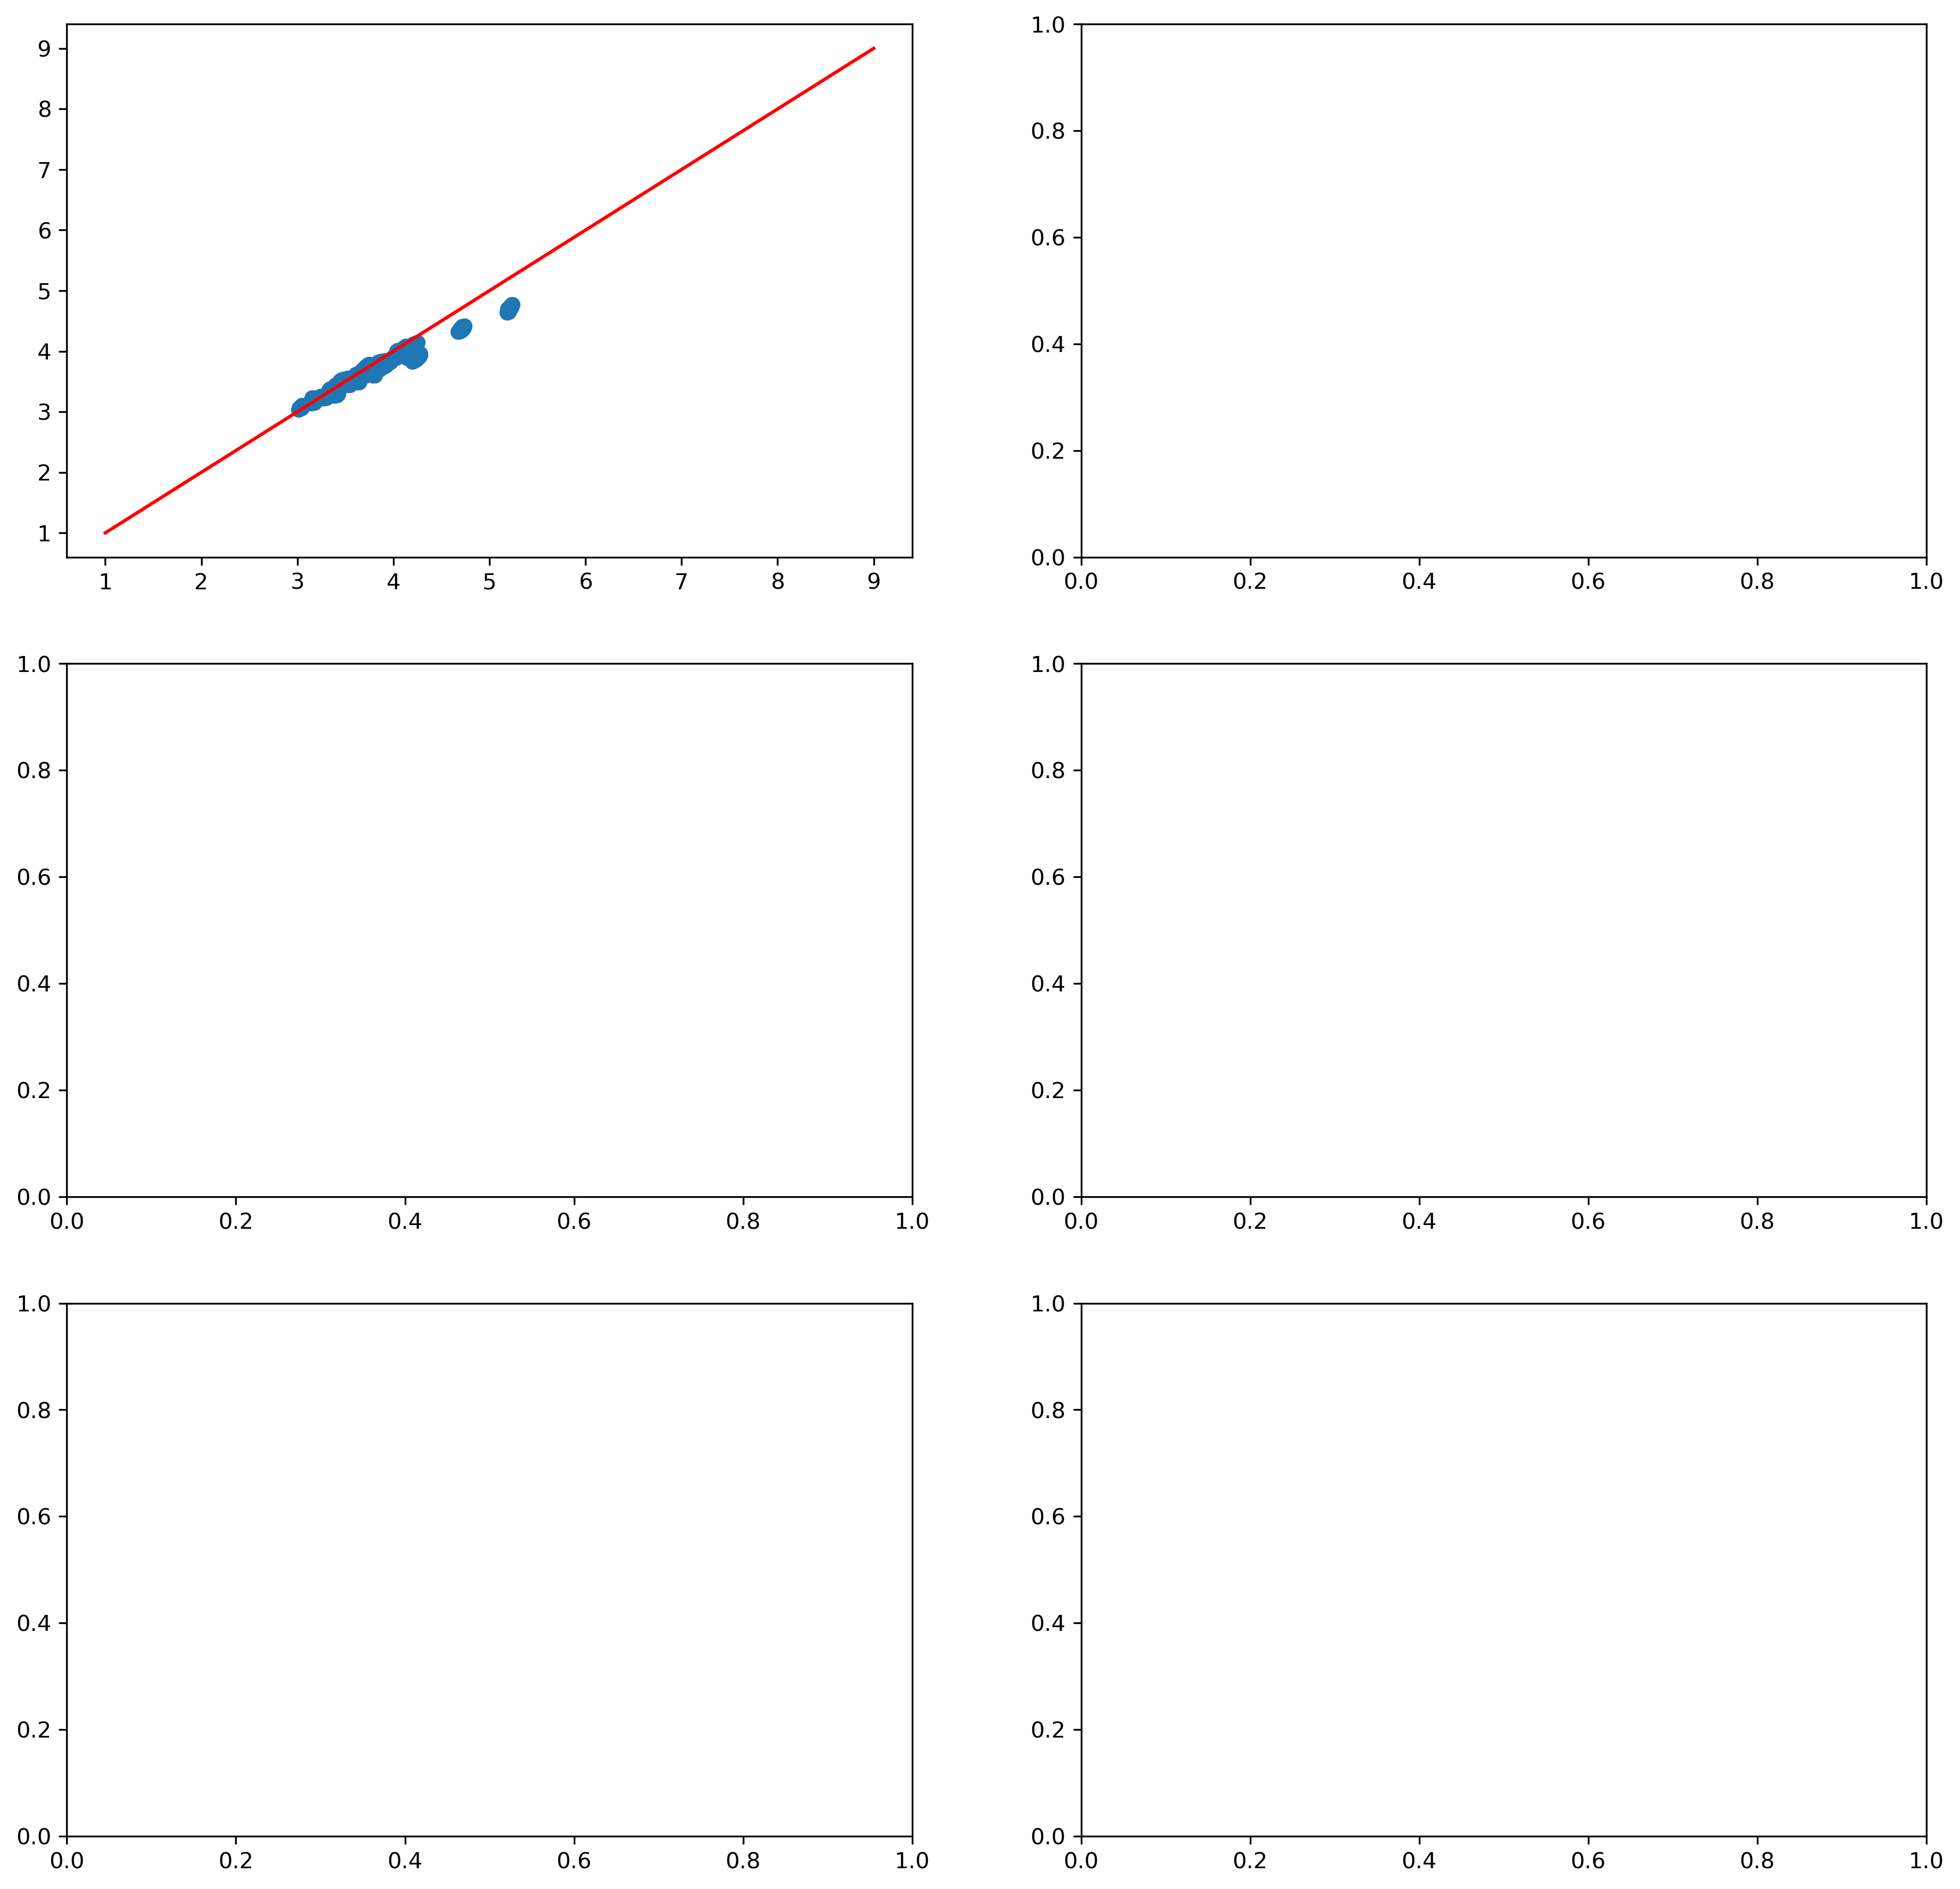

<Figure size 432x288 with 0 Axes>

In [133]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,15), dpi=300)
fig = plt.figure()

axes[0,0].plot(np.arange(1,10), np.arange(1,10), color = "red")
axes[0,0].scatter(ot_out["SRD (MJ/kg CO2)"], ANmodelA_outpredict[: , 0])

